# Dynamics of International Organized Violence [1946-2017]
### *-Hani Azam*

## Investigation Overview

In this investigation I want to examine the trends in the **1,221 conflicts** & **1,550 dyads** worldwide from 1946 to 2017 in the dataset. <br>
The primary features of analysis is the variation over time and across categories of conflicts of:
1. the frequency and characteristics of conflicts from 1946 to 2017, 
2. the identity and type of support warring parties receive from foreign entities parties,
3. number of new conflicts versus the persistence of existing conflicts over time and
4. the effect of rebel ideology, goal, religious affiliation and external support on conflict outcomes as well as variations in the frequency of outcome types



## Dataset Overview

The dataset is an integration of:
1. **The Uppsala Conflict Data Program Data Files**: the world’s main provider of data on organized violence and armed conflicts. The files used are:
>- UCDP Georeferenced Event Dataset Global version 18.1
>- UCDP One-sided Violence Dataset
>- UCDP/PRIO Armed Conflict Dataset version 18.1
>- UCDP Dyadic Dataset version 18.1
>- UCDP Conflict Termination Dataset version 2-2015
<br>
2. **Non-State Actor Dataset**: provides information on the military capabilities and politicalopportunities available to non-state actors in on-going civil wars. It is a direct expansion of the Uppsala Armed Conflict Data.
<br>
3. **The Foundations of Rebel Group Emergence Dataset**: provides information onthe origins of violent non-state actors engaged in armed conflict against their government. It draws upon the population of groups included in the Non-State Actor Dataset.

The features of the dataset are characteristics of the dyad in each year the dyad is active (i.e. results in 25 or more battle related deaths). These characteristics include the type of conflict, the parties involved, the location of the conflict, the ideology, religious affiliation and goal of the rebel group involved.

## Terminology

**Conflicts vs Dyads:**
> Conflicts are defined in terms of a single actor being targeted while dyads involve two armed and opposing actors. For example, the Government of Bolivia has been involved in three dyads:
1. Government of Bolivia vs Popular Revolutionary Movement
2. Government of Bolivia vs MNR
3. Government of Bolivia vs ELN

However, these *three dyads* are recorded as a *single conflict*. Conflicts are viewed through the lens of the targeted actor - in this case the Government of Bolivia.

The number of dyads will therefore exceed the number of conflicts.

**Conflicts Types:**
> There are three types of conflicts:
1. State-based conflict: dyad involves two actors (with one or more being the government) that have a stated incompatibility
2. Non-state conflict: dyad is constructed by at least two organized actors (of which none is the government of a state) that oppose each other with arms. 
3. One-sided Events: involves not dyads but armed actors (a government or a formally organized non-state group) attacking the civilian population
    

**Note:**
>While the dataset ranges from 1946-2017 only data for state based conflicts dates back to 1946. The recording of non-state and one-sided conflicts begins as of 1989. Comparisons across conflict types will therefore be restricted between 1989 to 2017.


In [1]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

sb.set_style("whitegrid",{'axes.grid': False})
plt.rcParams['font.family'] = "serif"

In [2]:
# load in the dataset into a pandas dataframe
conflict_df_copy=pd.read_csv('conflicts_ucdp.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### Conflict & Dyad Frequency [1989-2017]

> Between 1989 and 2017 there have been **1307 dyads** that roll up into **1112 conflicts**. 
The highest number of dyads are **non-state at 670** followed by **state-based dyads at 371** (which roll up into 176 conflicts) and **one-sided conflicts at 266.**
>Following the end of the Cold War, the number of conflicts worldwide had decreased substantially however in the last decade there has been a volatile, but salient increaes in the number of conflicts (and dyads). This upward trend is evident spans across all three categories of conflicts: state-based, non-state and one-sided.
<br>
•	Non-state violence has contributed the highest increase in conflict frequecy follow by state violence and then one-side violence (which has showed only a marginal increase over the last decade).
<br>
•	A hypothesis for the marginal increase in one-sided violence which also forms the smallest percentage of conflicts is that while one-sided violence is by definition directed towards Civilians, it is often in the name of a larger conflict against a government or rebel organization. Warring parties typically have a specific goal that can only be achieved by concession from or subversion of an authority in power. Civilians are often not in a position of power and are rather more commonly used as pawns used to make a statement.



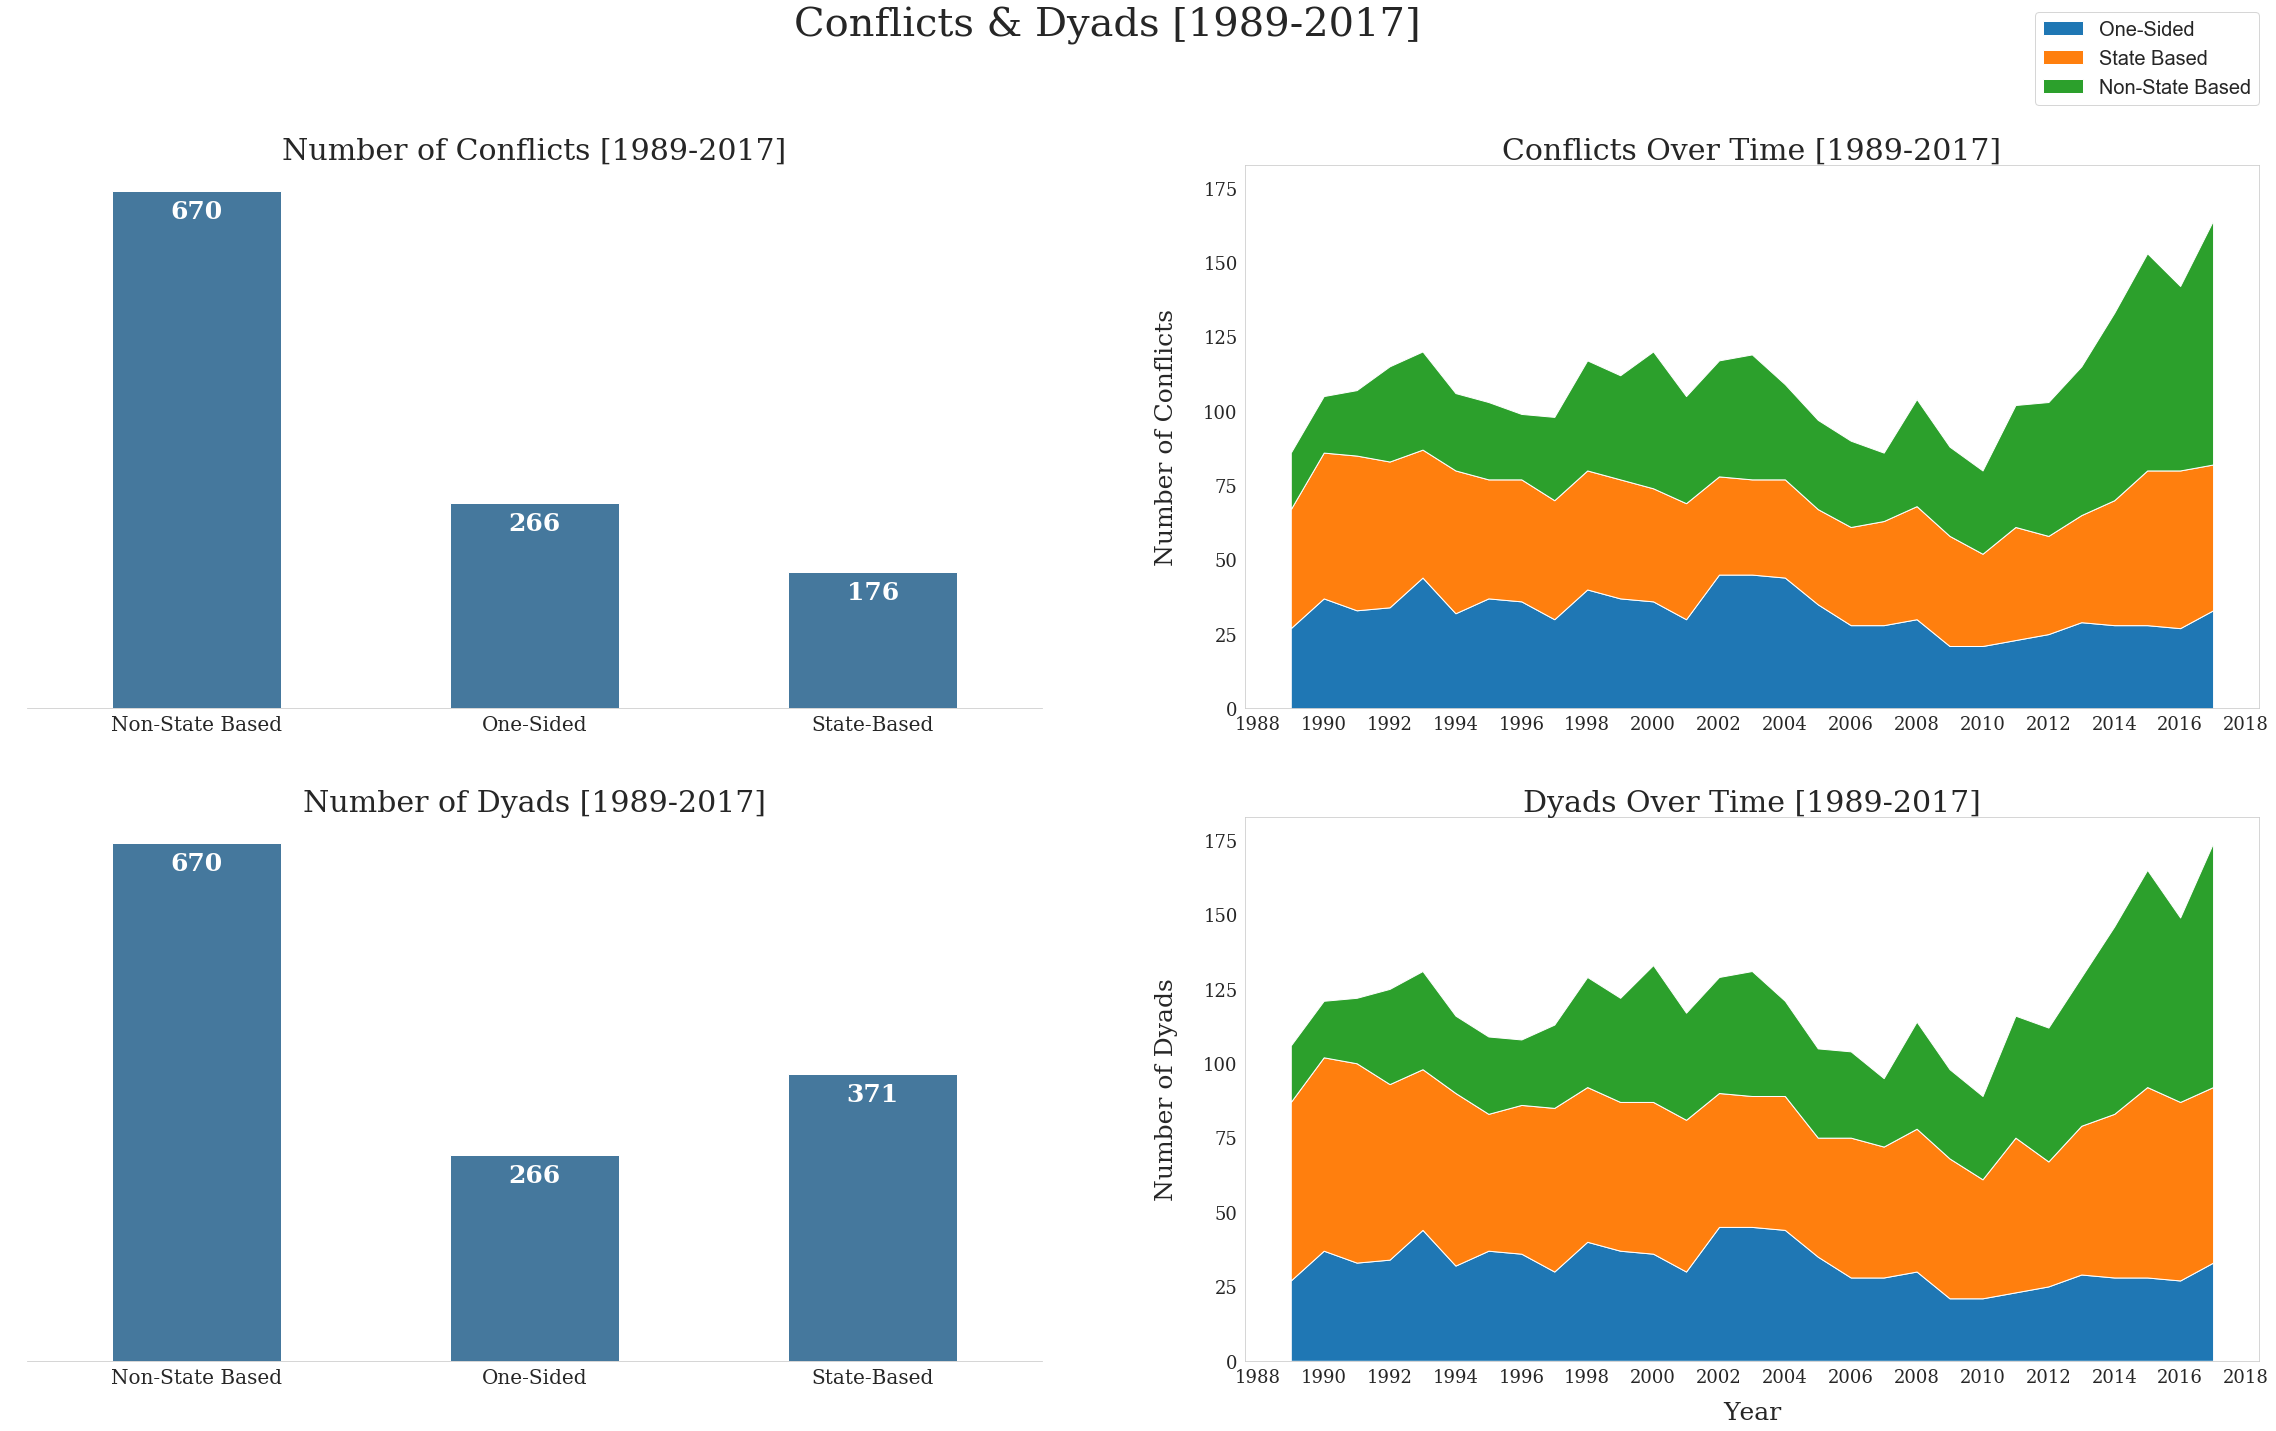

In [44]:
#STATE BASED CONFLICT TYPES
conflict_type=conflict_df_copy.query('year>=1989')[['conflict_type','new_ucdpid_18']].drop_duplicates()
conflict_type_order=conflict_type['conflict_type'].value_counts().index
conflict_type_over_time=conflict_df_copy.query('year>=1989')[['new_ucdpid_18','year','conflict_type']].drop_duplicates().groupby(['year','conflict_type']).count().reset_index()

#STATE BASED DYAD TYPES
dyad_type=conflict_df_copy.query('year>=1989')[['conflict_type','new_dyadid_18']].drop_duplicates()
dyad_type_over_time=conflict_df_copy.query('year>=1989')[['new_dyadid_18','year','conflict_type']].drop_duplicates().groupby(['year','conflict_type']).count().reset_index()



#set parameters
plt.rcParams['font.family'] = "serif"



#S CONFLICT TYPES COUNT PLOT
fig, ax = plt.subplots(2,2,figsize=(40,22), sharey='col',)
sb.set_style("whitegrid",{'axes.grid': False})
base_color = sb.color_palette("Blues_d")[2]
sb.countplot(data = conflict_type, x = 'conflict_type', color = base_color,order=conflict_type_order,ax=ax[0,0])
for bar in ax[0,0].patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2
    bar.set_x(centre - .5/2)
    bar.set_width(.5)
  
    
# add annotations to conflict type count plot
conflict_total,conflict_cat_counts,conflict_loc, conflict_labels = conflict_type.shape[0],conflict_type['conflict_type'].value_counts(),ax[0,0].get_xticks(),ax[0,0].get_xticklabels() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(conflict_loc, conflict_labels):
    # get the text property for the label to get the correct count
    count = conflict_cat_counts[label.get_text()]
    pct_string = count
    # print the annotation just below the top of the bar
    ax[0,0].text(loc, count-35, pct_string, ha = 'center', color = 'w',family='serif',size=25,weight='bold'
            )

#set xaxislabels    
ax[0,0].set(xlabel='', ylabel='',yticklabels=[''],xticklabels=["Non-State Based",'One-Sided','State-Based']);
ax[0,0].xaxis.set_tick_params(labelsize=20)
ax[0,0].set_title('Number of Conflicts [1989-2017]', size=30) # Title
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)



#DYAD TYPES COUNT PLOT
sb.set_style("whitegrid",{'axes.grid': False})
base_color = sb.color_palette("Blues_d")[2]
sb.countplot(data = dyad_type, x = 'conflict_type', color = base_color,order=conflict_type_order,ax=ax[1,0])
for bar in ax[1,0].patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2
    bar.set_x(centre - .5/2)
    bar.set_width(.5)
  
    
# add annotations to dyad type count plot
dyad_total,dyad_cat_counts,dyad_loc, dyad_labels = dyad_type.shape[0], dyad_type['conflict_type'].value_counts(), ax[1,0].get_xticks(),ax[1,0].get_xticklabels() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(dyad_loc, dyad_labels):
    # get the text property for the label to get the correct count
    count = dyad_cat_counts[label.get_text()]
    pct_string = count
    # print the annotation just below the top of the bar
    ax[1,0].text(loc, count-35, pct_string, ha = 'center', color = 'w',family='serif',size=25,weight='bold'
            )

    
ax[1,0].set(xlabel='', ylabel=' ',yticklabels=[''],xticklabels=["Non-State Based",'One-Sided','State-Based']);
ax[1,0].xaxis.set_tick_params(labelsize=20)
ax[1,0].set_title('Number of Dyads [1989-2017]', size=30) # Title
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['left'].set_visible(False)






#SCONFLICT TYPE STACK PLOT
x=np.arange(1989,2018).repeat(4)
y0=pd.DataFrame(x,columns=['year']).merge(conflict_type_over_time.query('conflict_type=="onesided"'),how='left',on='year').fillna(0).new_ucdpid_18
y1=pd.DataFrame(x,columns=['year']).merge(conflict_type_over_time.query('conflict_type=="state_based"'),how='left',on='year').fillna(0).new_ucdpid_18
y2=pd.DataFrame(x,columns=['year']).merge(conflict_type_over_time.query('conflict_type=="nonstate_based"'),how='left',on='year').fillna(0).new_ucdpid_18
ax[0,1].stackplot(x,y0, y1,y2)


#DYAD STACK PLOT
x=np.arange(1989,2018).repeat(4)
y4=pd.DataFrame(x,columns=['year']).merge(dyad_type_over_time.query('conflict_type=="onesided"'),how='left',on='year').fillna(0).new_dyadid_18
y5=pd.DataFrame(x,columns=['year']).merge(dyad_type_over_time.query('conflict_type=="state_based"'),how='left',on='year').fillna(0).new_dyadid_18
y6=pd.DataFrame(x,columns=['year']).merge(dyad_type_over_time.query('conflict_type=="nonstate_based"'),how='left',on='year').fillna(0).new_dyadid_18

ax[1,1].stackplot(x, y4,y5, y6, labels=['One-Sided','State Based','Non-State Based'])
ax[1,1].legend(loc='upper right', bbox_to_anchor=(1.01, 2.5),prop={'size': 20});


#STACK PLOT ASTHETICS
stackplot_titles=['Conflicts Over Time [1989-2017]','Dyads Over Time [1989-2017]']
xlabels=['','Year']
ylabels=['Number of Conflicts','Number of Dyads']
plt.rcParams['font.family'] = "serif"
fig.suptitle('Conflicts & Dyads [1989-2017]',size=40)

for ax,title,xlabel,ylabel in zip(ax.flatten()[[1,3]],stackplot_titles, xlabels,ylabels):
    ax.set(xticks=np.arange(1988,2018+2,2));
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.set_title(title, size=30) # Title
    ax.set_xlabel(xlabel=xlabel,labelpad=15,size=25)
    ax.set_ylabel(ylabel=ylabel,labelpad=25,size=25);



## Trends in Conflict Intensity [1989-2017]:

- The number of battle related deaths peaked in 1994 and this is strongly attributed to the Rwandan genocide, which was a mass slaughter of the Tutsi minority and moderate Hutu in Rwanda, organized the core Hutu political elite, and took place between 7 April and 15 July 1994 during the Rwandan Civil War.
- While the number of conflicts has increased signficantly over time (105% between 2010 and 2017) it appears these conflicts are smaller scale as the number of battle related deaths per year has been in decline since 2014. Therefore conflicts appear to have increase in numbers but declined in intensity.
- This is corroborated by statistics on the intensity of conflicts by dyad by year. It is evident that the number of wars (characterized as conflicts with greater than a 1000 battle related deaths) have been significantly less than the number minor conflicts (conflcits with battle related deaths between 25-999) between 1989 and 2017. However, while the number of minor conflicts have increased over time, the number of wars have tended towards a decline (albeit marginal). In the case of one-sided conflicts, the last documented war was in 2011 perpetrated by the Government of Syria against Syrian civilians).

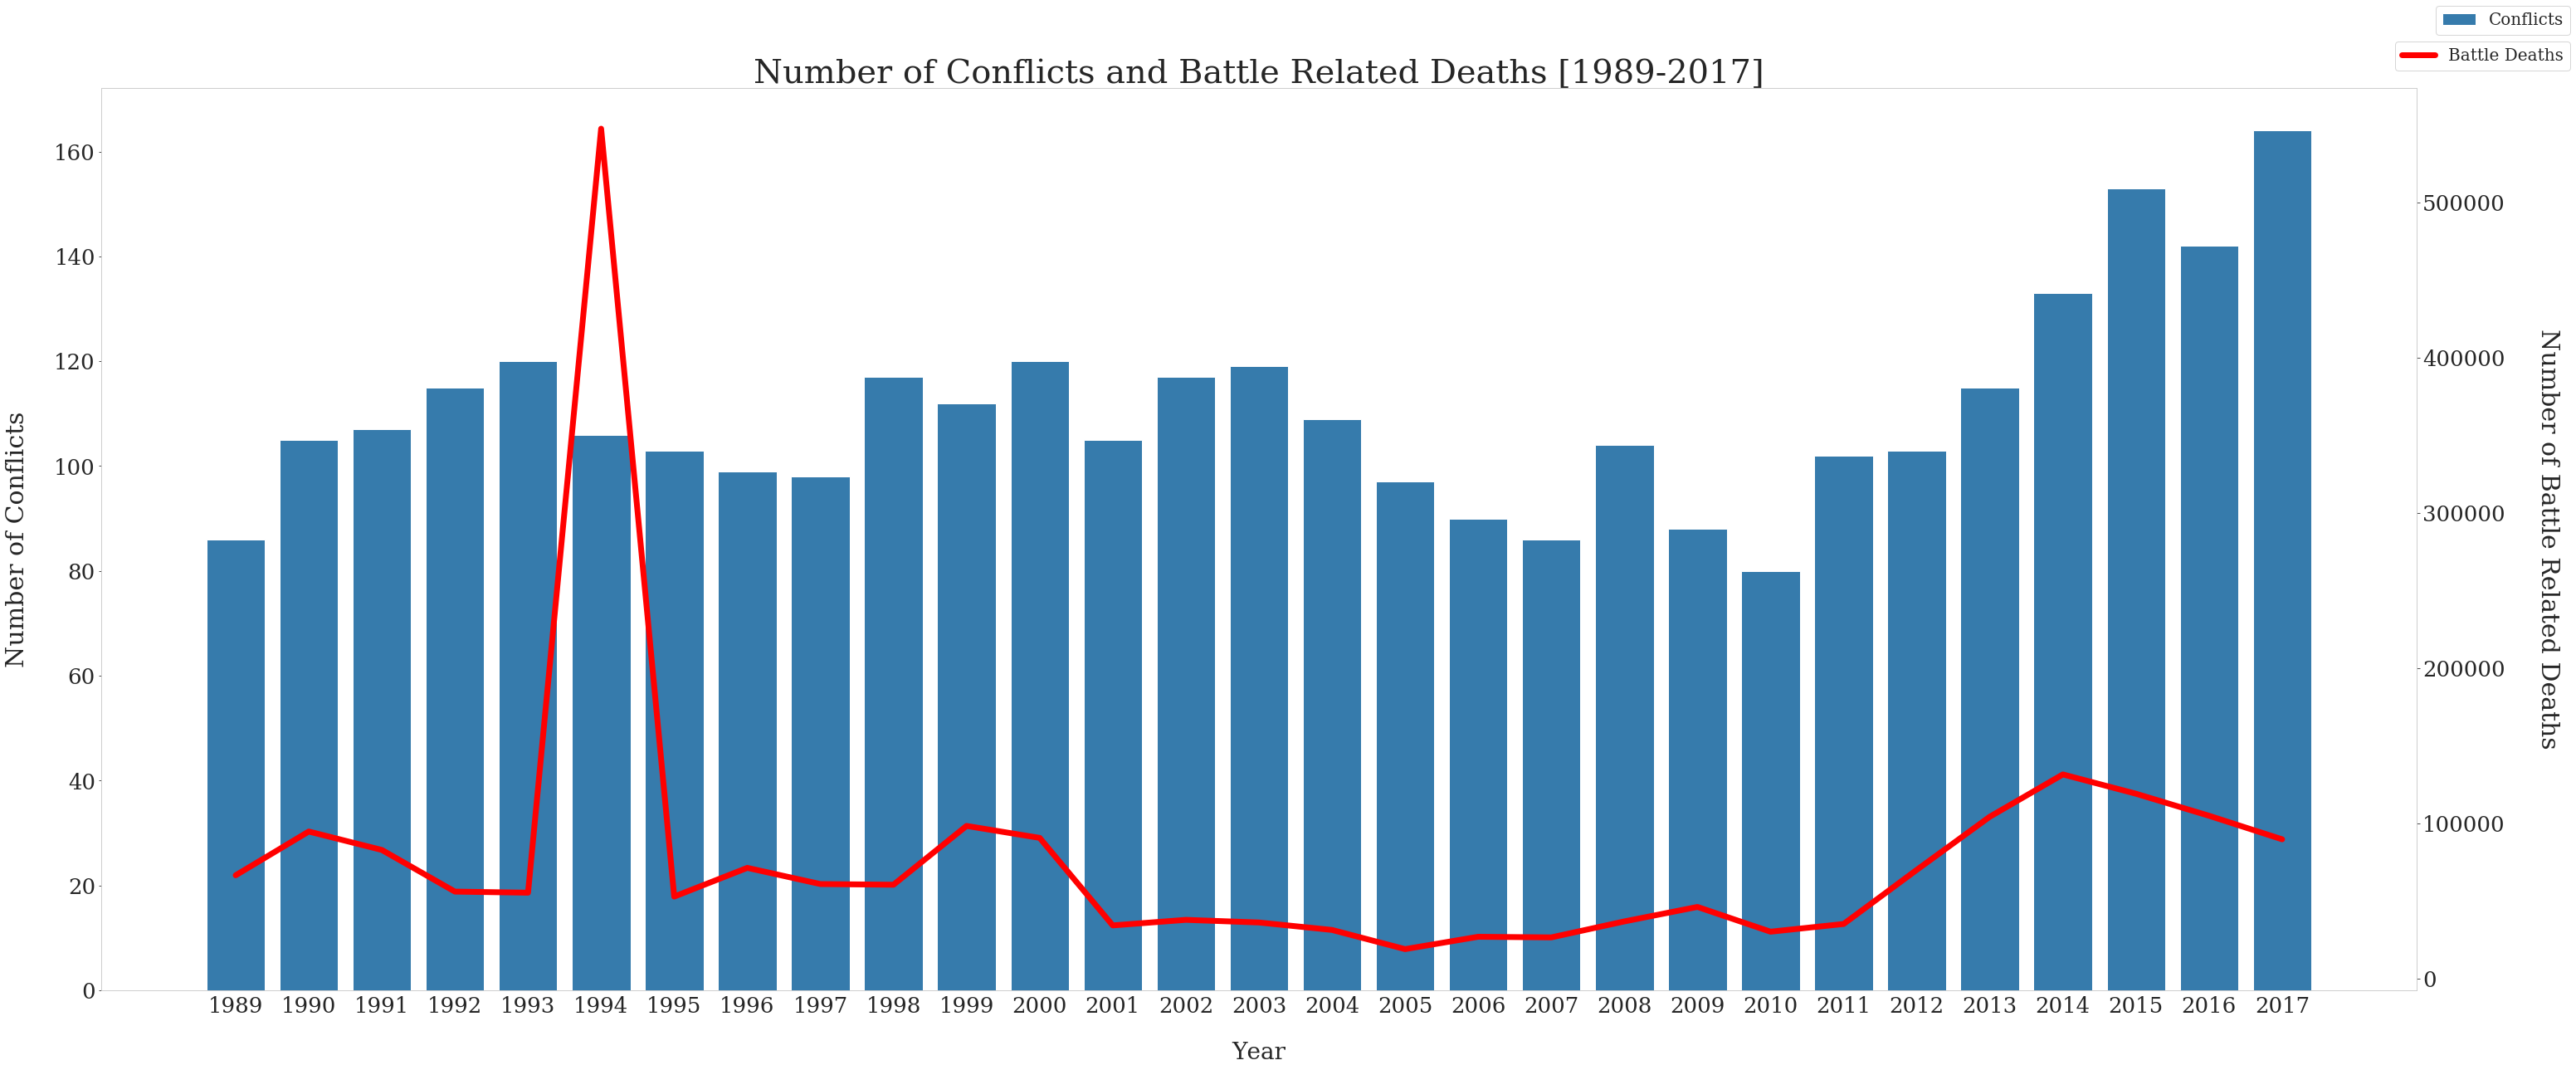

In [66]:
#PLOT 1 DATAFRAME 
battle_related_deaths_per_year=conflict_df_copy.query('year>=1989').groupby('year')['best_fatality_estimate'].sum().reset_index()
number_of_conflicts=conflict_df_copy[['new_ucdpid_18','year']].query('year>=1989').drop_duplicates().groupby('year')['new_ucdpid_18'].count().reset_index()

#PLOT 2 DATAFRAME 
years=pd.DataFrame({'year':np.arange(1950,2010)})
avg_conflicts_per_yr=years.merge(conflict_df_copy[['new_dyadid_18','intensity','year','type']],how='left',on='year')
avg_conflicts_per_yr['decade']=avg_conflicts_per_yr.year//10*10
avg_conflicts_per_yr=avg_conflicts_per_yr.groupby(['decade','intensity'])['new_dyadid_18'].count().reset_index().sort_values('decade').rename(columns={'new_dyadid_18':'count'})
avg_conflicts_per_yr['count']=avg_conflicts_per_yr['count']/10


plt.rcParams['font.family'] = "serif"

fig, ax = plt.subplots(figsize=(50,20))

#COUNTPLOT - NUMBER OF CONFLICTS
ax1=plt.bar(x='year',height='new_ucdpid_18',data=number_of_conflicts, color = base_color,label='Conflicts')

#COUNTPLOT ASTHETICS
ax.set_title('Number of Conflicts and Battle Related Deaths [1989-2017]',fontsize=40)
ax.set_xticks(np.arange(1989,2017+1,1))
ax.set_xticklabels(np.arange(1989,2017+1,1),fontsize=26)
ax.set_yticklabels(np.arange(0,160+20,20),fontsize=26)
ax.set_xlabel(xlabel='Year',labelpad=30,fontsize=28)
ax.set_ylabel('Number of Conflicts',labelpad=30,fontsize=30)


#LINE PLOT - BATTLE RELATED DEATHS
ax4=ax.twinx()
ax5=ax4.plot(battle_related_deaths_per_year.year.values,battle_related_deaths_per_year.best_fatality_estimate.values,linewidth=7, color='red',label='Battle Deaths');
ax4.set_ylabel('Number of Battle Related Deaths',labelpad=65,fontsize=30,rotation=270)
ax4.set_yticklabels(np.arange(-100000,500000+100000,100000),fontsize=26)

#OVERALL
minor_v_war=np.where(conflict_df_copy.query('year>=1989')['best_fatality_estimate']>=1000,'war','minor')
conflict_intensity=conflict_df_copy[['year']].query('year>=1989').join(pd.DataFrame(minor_v_war,columns=['intensity_level'])).sort_values('year').groupby(['year','intensity_level'])[['intensity_level']].count()
conflict_intensity.rename(columns={'intensity_level':'count'},inplace=True)
conflict_intensity=conflict_intensity.reset_index()


#STATE BASED
statebased_minor_v_war=np.where(conflict_df_copy.query('year>=1989 & conflict_type=="state_based"')['best_fatality_estimate']>=1000,'war','minor')
statebased_intensity=conflict_df_copy[['year']].query('year>=1989').join(pd.DataFrame(minor_v_war,columns=['intensity_level'])).sort_values('year').groupby(['year','intensity_level'])[['intensity_level']].count()
statebased_intensity.rename(columns={'intensity_level':'count'},inplace=True)
statebased_intensity=statebased_intensity.reset_index()

#NONSTATE
nonstate_minor_v_war=np.where(conflict_df_copy.query('year>=1989 & conflict_type=="nonstate_based"')['best_fatality_estimate']>=1000,'war','minor')
nonstate_intensity=conflict_df_copy[['year']].query('year>=1989').join(pd.DataFrame(nonstate_minor_v_war,columns=['intensity_level'])).sort_values('year').groupby(['year','intensity_level'])[['intensity_level']].count()
nonstate_intensity.rename(columns={'intensity_level':'count'},inplace=True)
nonstate_intensity=nonstate_intensity.reset_index()

#ONESIDED
onesided_minor_v_war=np.where(conflict_df_copy.query('year>=1989 & conflict_type=="onesided"')['best_fatality_estimate']>=1000,'war','minor')
onesided_intensity=conflict_df_copy[['year']].query('year>=1989').join(pd.DataFrame(onesided_minor_v_war,columns=['intensity_level'])).sort_values('year').groupby(['year','intensity_level'])[['intensity_level']].count()
onesided_intensity.rename(columns={'intensity_level':'count'},inplace=True)
onesided_intensity=onesided_intensity.reset_index()

ax.legend(loc='upper right',bbox_to_anchor=(1.07, 1.10),prop={'size': 20});

ax4.legend(loc='lower right',bbox_to_anchor=(1.07, 1.01),prop={'size': 20});




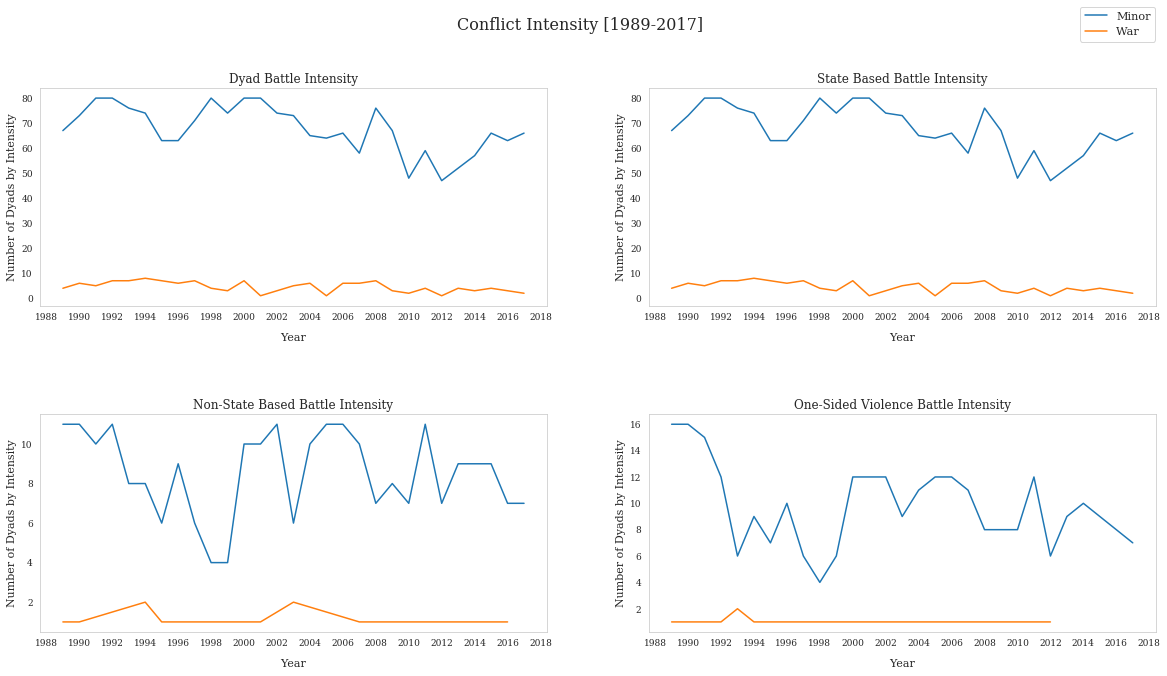

In [19]:

#dyads_over_time
fig,ax=plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=.5)
fig.suptitle('Conflict Intensity [1989-2017]', fontsize=16)
sb.lineplot(x='year', y='count', hue='intensity_level', data=conflict_intensity,err_style=None,ax=ax[0,0])
sb.lineplot(x='year', y='count', hue='intensity_level', data=statebased_intensity,err_style=None,ax=ax[0,1])
sb.lineplot(x='year', y='count', hue='intensity_level', data=onesided_intensity,err_style=None,ax=ax[1,0])
sb.lineplot(x='year', y='count', hue='intensity_level', data=nonstate_intensity,err_style=None,ax=ax[1,1])
titles=['Dyad Battle Intensity','State Based Battle Intensity','Non-State Based Battle Intensity','One-Sided Violence Battle Intensity']
for title,ax in zip(titles,ax.flatten()):
    ax.set_xlabel('Year',fontsize=11,labelpad=11
                 )
    ax.set_ylabel('Number of Dyads by Intensity',fontsize=11)
    ax.set_title(title,fontsize=12)
    ax.set_xticks(np.arange(1988,2018+2,2))
    ax.get_legend().remove()
    ax.tick_params(labelsize=9)

    
plt.legend(loc='upper right',labels=['Minor','War'],bbox_to_anchor=(1.01, 2.9),prop={'size': 11.3});
    

## Trends in Dyad Onset vs Incidence [1989-2017]:

- While there has been an increase in the number of dyads it is interesting to distinguish between the onset (start) of new dyads, the incidence (or continuation) of existence dyads and the termination of dyads.
- At an aggregate level the number of ongoing dyads is higher than the number of new dyads. This is also true for state based dyads and one-sided violence.
- Non-state dyads are the only conflict group with an onset to incidence ratio greater than one. Noteably, non-state dyads form the majority of dyads and have also contribute the most to the increase in dyads over the last decade.
- The rate of termination of conflicts is marginal compared to the rates of conflict onset and incidence.
- With the exception of nonstate dyads the rise in the number of conflicts is therefore largely due to a low rate of conflict termination rather than a high rate of conflict onset.

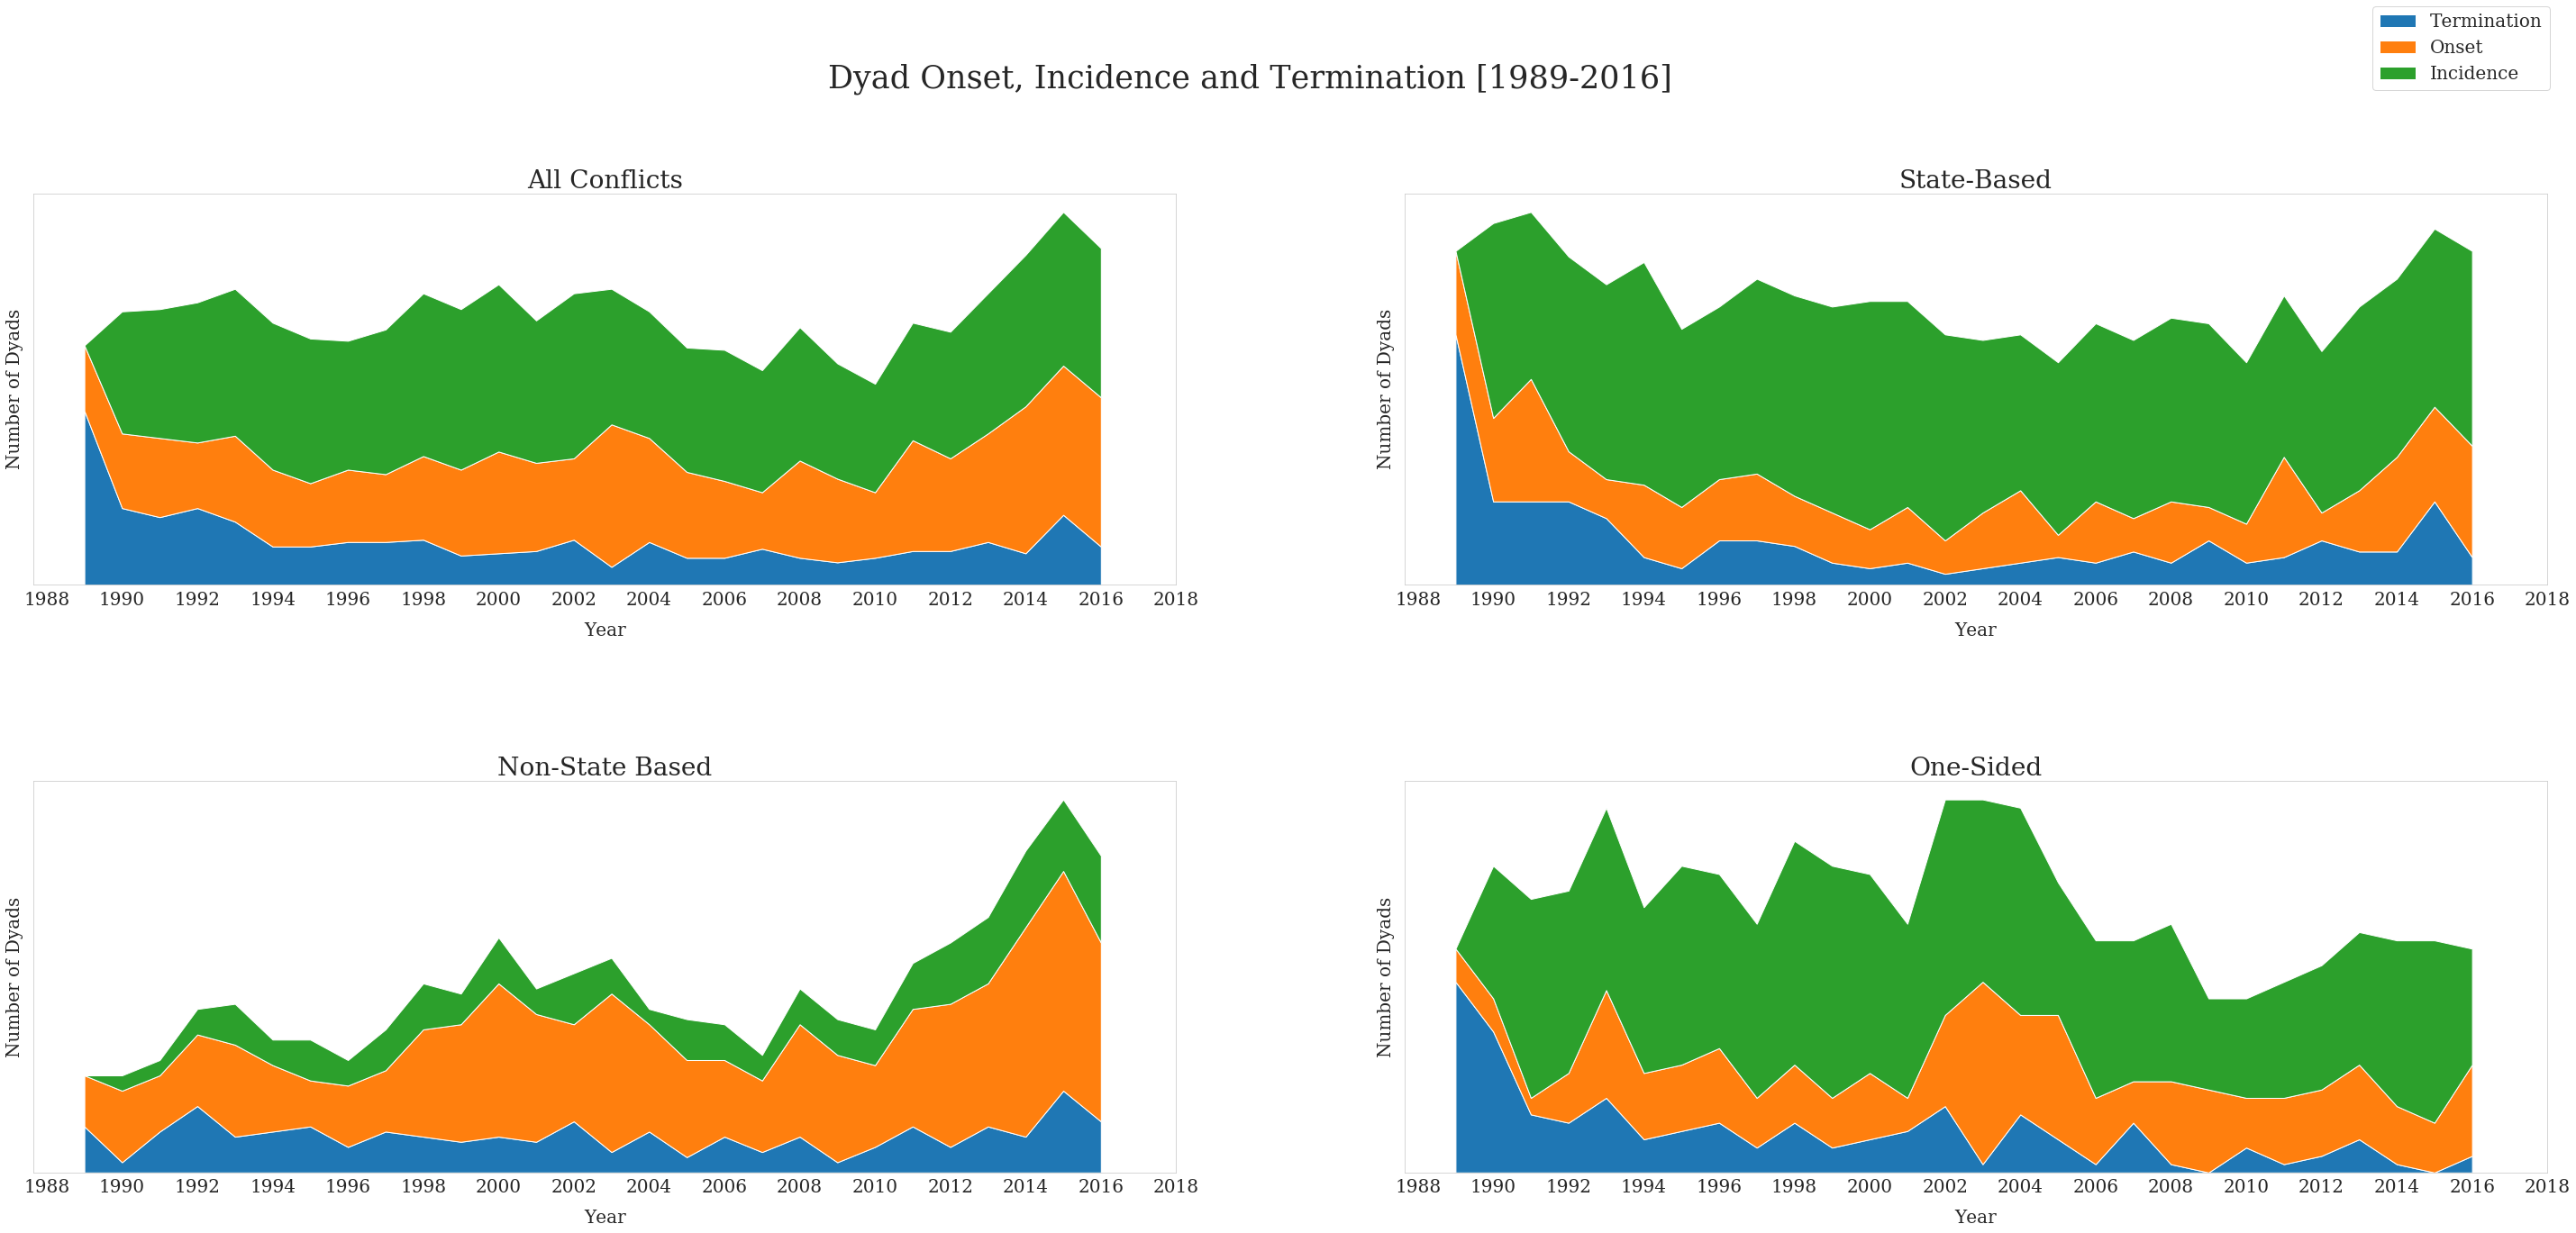

In [23]:
conflict_duration=conflict_df_copy.query('year>=1989').copy()
conflict_duration['incidence']=conflict_duration.groupby('new_dyadid_18').cumcount()+1


conflict_duration=conflict_duration[['conflict_type','new_dyadid_18','year','incidence']].drop_duplicates()
conflict_duration['duration']=conflict_duration.groupby('new_dyadid_18')["incidence"].transform('max')
conflict_duration['terminated']=np.where(conflict_duration.incidence==conflict_duration.duration,'Yes','No')


incidence=conflict_duration.query('terminated=="No" & incidence!=1')[['conflict_type','new_dyadid_18','year','incidence']].drop_duplicates()
incidence.insert(0,'duration_type','incidence')
onset=conflict_duration.query('terminated=="No"& incidence==1')[['conflict_type','new_dyadid_18','year','incidence']].drop_duplicates()
onset.insert(0,'duration_type','onset')


termination=conflict_duration.query('terminated=="Yes" & year<2017')[['conflict_type','new_dyadid_18','year','incidence']].drop_duplicates()
termination.insert(0,'duration_type','termination')


conflict_duration=pd.concat([incidence,onset,termination])
x=conflict_duration.sort_values('year').year.unique()

y0=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('duration_type=="onset"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y1=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('duration_type=="termination"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y2=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('duration_type=="incidence"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18

y3=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="state_based" & duration_type=="onset"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y4=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="state_based" & duration_type=="termination"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y5=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="state_based" & duration_type=="incidence"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18

y6=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="nonstate_based" & duration_type=="onset"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y7=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="nonstate_based" & duration_type=="termination"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y8=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="nonstate_based" & duration_type=="incidence"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18

y9=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="onesided" & duration_type=="onset"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y10=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="onesided" & duration_type=="termination"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18
y11=pd.DataFrame(x,columns=['year']).merge(conflict_duration.query('conflict_type=="onesided" & duration_type=="incidence"').groupby(['year','duration_type'])['new_dyadid_18'].count().reset_index(),how='left',on='year').fillna(0).new_dyadid_18


fig, ax = plt.subplots(2,2,figsize=(50,20))

title=['All Conflicts','State-Based','Non-State Based','One-Sided']
fig.suptitle('Dyad Onset, Incidence and Termination [1989-2016]',size=35)
ax[0,0].stackplot(x, y0, y1,y2)
ax[0,1].stackplot(x, y3, y4,y5)
ax[1,0].stackplot(x, y6, y7,y8)
ax[1,1].stackplot(x, y9, y10,y11,labels=['Termination','Onset','Incidence']);
fig.subplots_adjust(hspace=.5)
for title, ax in zip(title,ax.flatten()):
    ax.set_xlabel('Year',fontsize=20,labelpad=15)
    ax.set_ylabel('Number of Dyads',fontsize=20)
    ax.set_title(title,fontsize=28)
    ax.set_xticks(np.arange(1988,2018+2,2))
    ax.set_xticklabels(np.arange(1988,2018+2,2),size=20)
    ax.set_yticklabels(ax.get_yticklabels(),size=20);

ax.legend(loc='upper right', bbox_to_anchor=(1.01, 3),prop={'size': 20});


## State Based

-	The number of state based conflicts has increased dramatically over the last decade and approaching the peak it reached during the Cold War.
-	There are four types of state based conflicts:
1. extrasystemic: by a state system member outside its borders against the armed forces of a non state entity that is not under the purview of the state
2. interstate: conflicts fought between two recognized sovereign states
3. internal: conflicts between a government and an organized rebel group
4. internal internationalized: internal conflicts with intervention from foreign governments. 


-	**Internal** followed by **internationalized internal** conflicts have been the most popular forms of state based conflict.
- Interestingly, the first internationalized internal conflicts were recorded in the late 1950s while the other three conflict types have records as early as 1945.
- The explosion in the internal and internationalized internal conflicts is due in large part to two drivers. First were the struggles over control in newly formed states soon after they achieved independence from colonial powers; second was the Cold War that fuelled many “proxy wars” in the developing world.


-	**Extrastate** conflicts were hallmarks of the colonial era and were common during the decoloniation period but the last record of this conflict was in 1974.
-	The number of **interstate** conflicts is somewhat erratic but remains low during the entire period. Of course, this category of war cannot be disregarded. Some of the interstate conflicts, such as the Korean War, the Vietnam War, and the Iran–Iraq War, have claimed more than a million battle casualties each. Interstate conflicts have been a little less frequent in the post-Cold War period, and for two years (1994–95) did not occur at all.


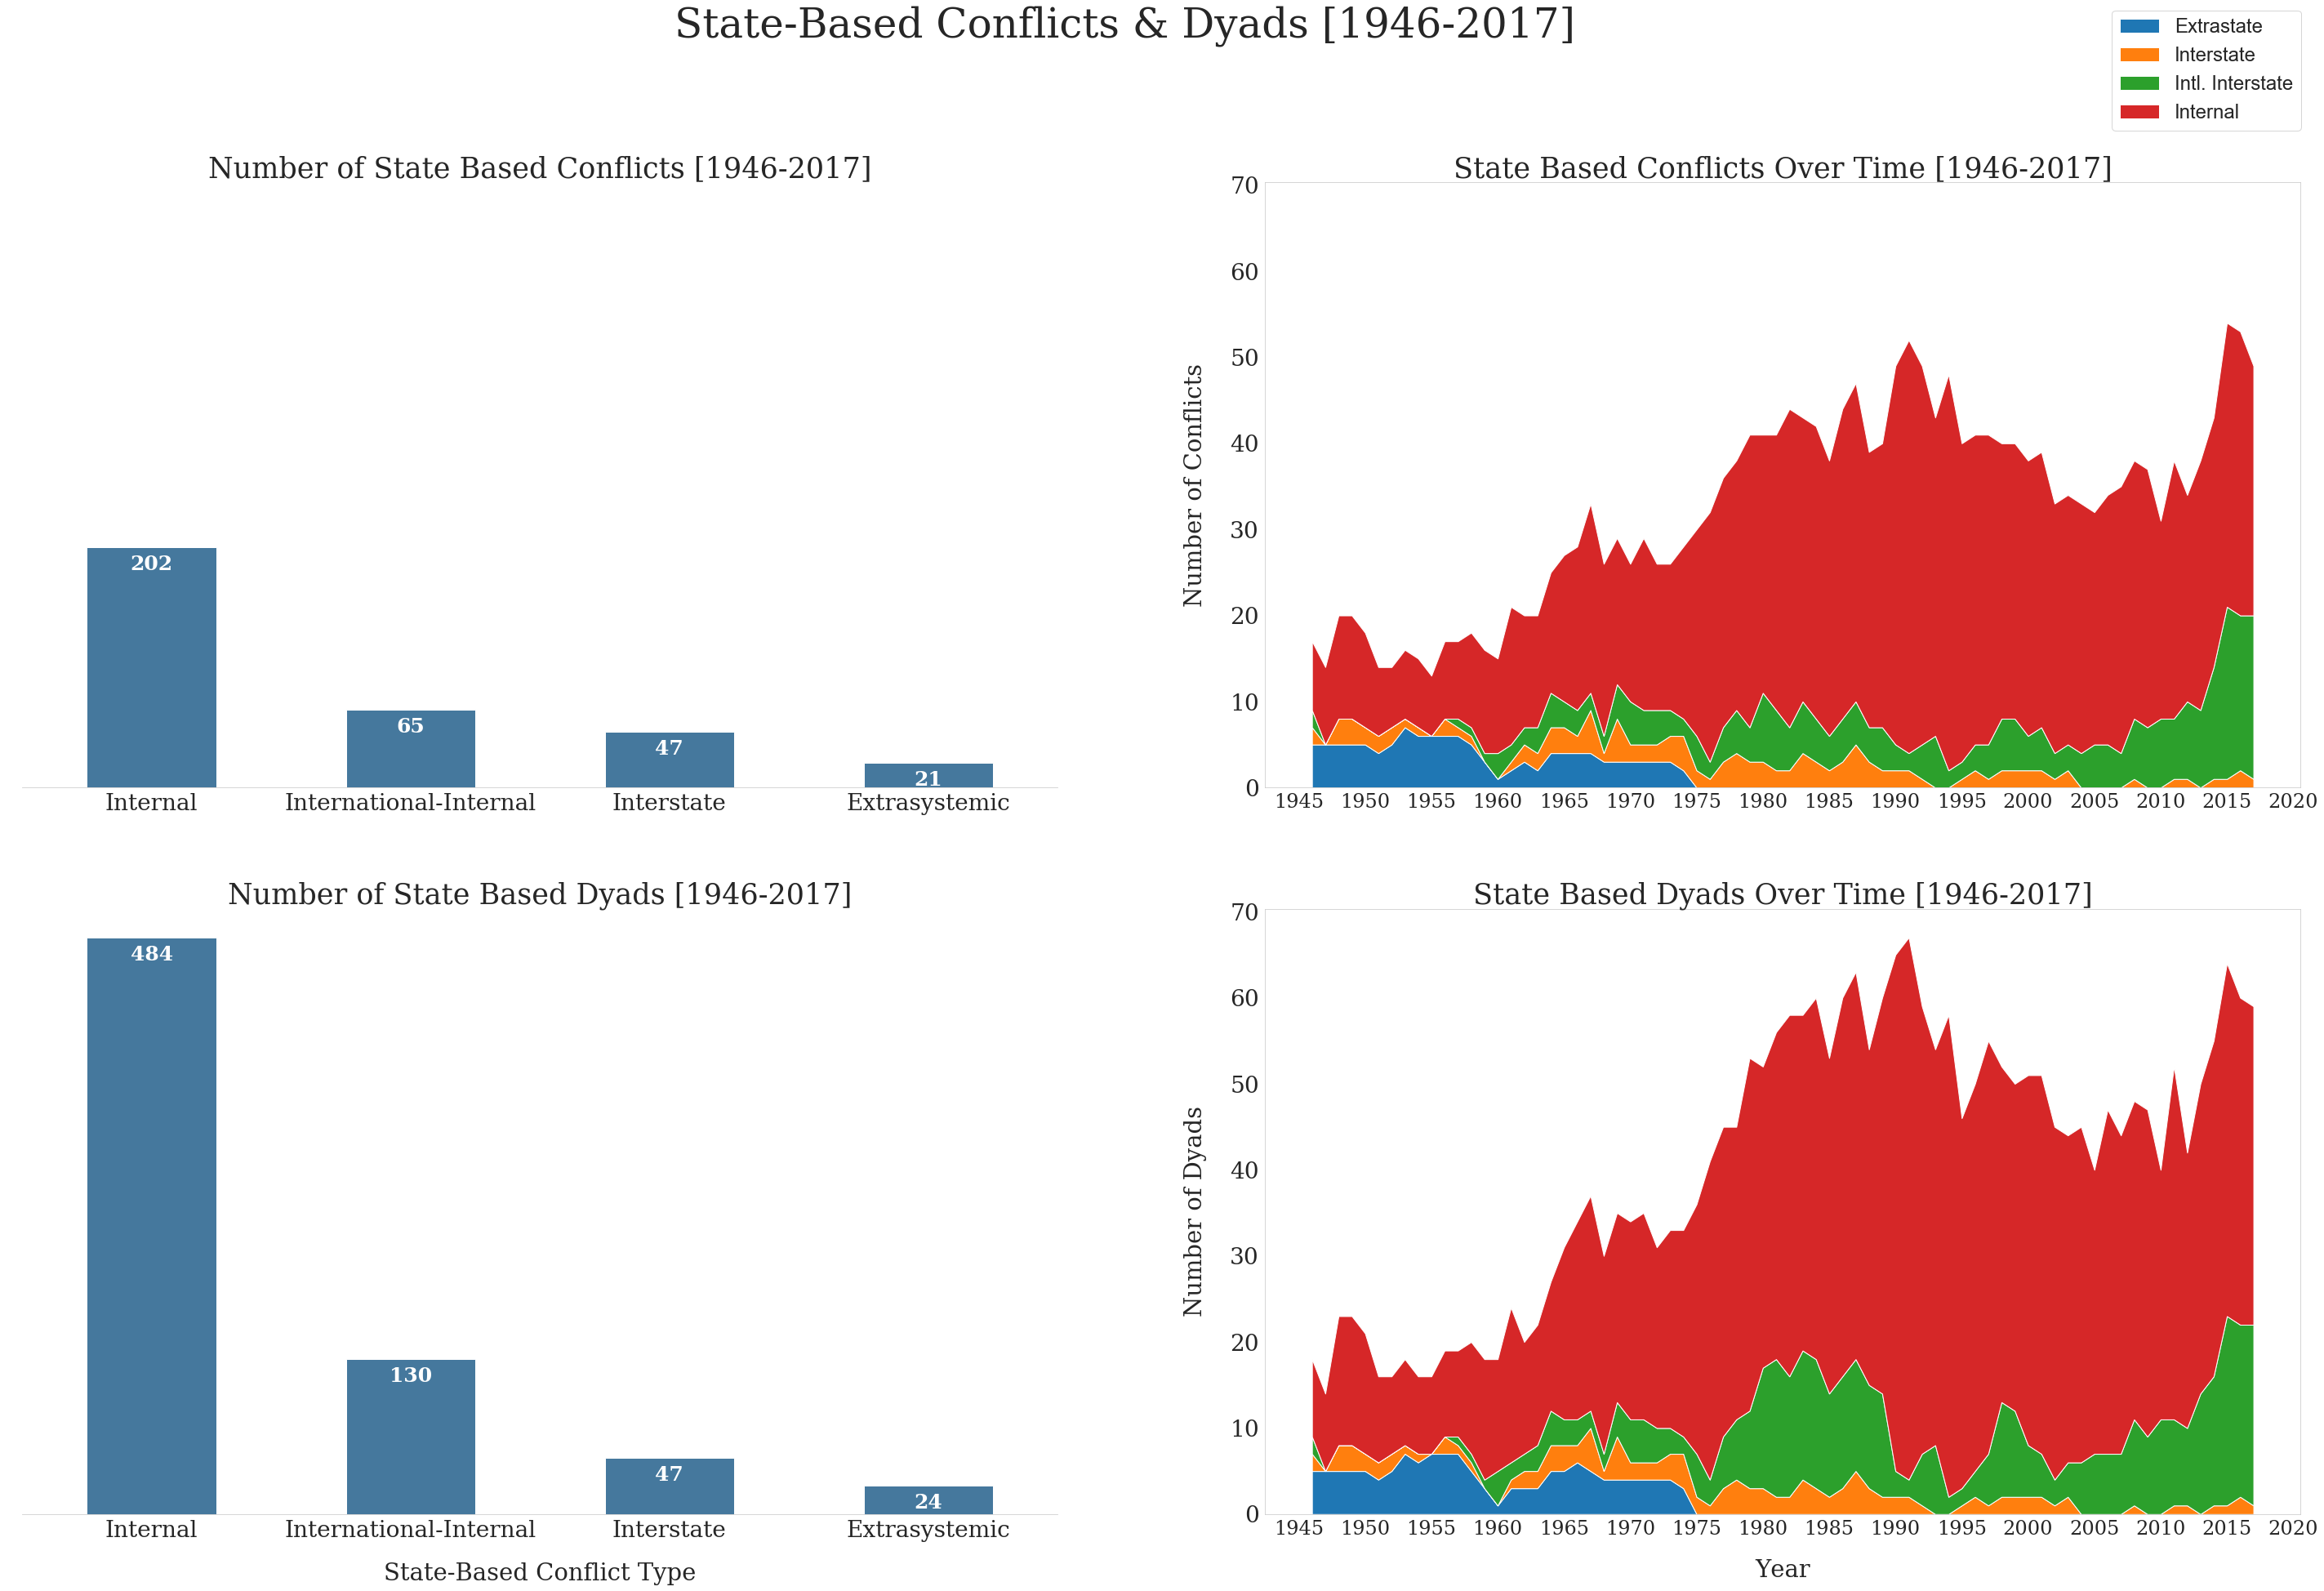

In [46]:
#STATE BASED CONFLICT TYPES
statebased_type=conflict_df_copy.query('conflict_type=="state_based"')[['type','new_ucdpid_18']].drop_duplicates()
statebased_type_order=statebased_type['type'].value_counts().index
statebased_type_over_time=conflict_df_copy.query('conflict_type=="state_based"')[['new_ucdpid_18','year','type']].drop_duplicates().groupby(['year','type']).count().reset_index()

#STATE BASED DYAD TYPES
dyad_type=conflict_df_copy.query('conflict_type=="state_based"')[['type','new_dyadid_18']].drop_duplicates()
dyad_type_over_time=conflict_df_copy.query('conflict_type=="state_based"')[['new_dyadid_18','year','type']].drop_duplicates().groupby(['year','type']).count().reset_index()



#set parameters
plt.rcParams['font.family'] = "serif"



#STATE BASED CONFLICT TYPES COUNT PLOT
fig, ax = plt.subplots(2,2,figsize=(50,30), sharey='col')
sb.countplot(data = statebased_type, x = 'type', color = base_color,order=statebased_type_order,ax=ax[0,0])
for bar in ax[0,0].patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2
    bar.set_x(centre - .5/2)
    bar.set_width(.5)
  
    
# add annotations to conflict type count plot
conflict_total,conflict_cat_counts,conflict_loc, conflict_labels = statebased_type.shape[0],statebased_type['type'].value_counts(),ax[0,0].get_xticks(),ax[0,0].get_xticklabels() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(conflict_loc, conflict_labels):
    # get the text property for the label to get the correct count
    count = conflict_cat_counts[label.get_text()]
    pct_string = count
    # print the annotation just below the top of the bar
    ax[0,0].text(loc, count-19, pct_string, ha = 'center', color = 'w',family='serif',size=25,weight='bold'
            )

#set xaxislabels    
ax[0,0].set(xlabel='', ylabel='',yticklabels=[''],xticklabels=["Internal",'International-Internal','Interstate','Extrasystemic']);
ax[0,0].set_title('Number of State Based Conflicts [1946-2017]', size=35) # Title
ax[0,0].spines['right'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['left'].set_visible(False)
ax[0,0].xaxis.set_tick_params(labelsize=28)


#STATE BASED DYAD TYPES COUNT PLOT
sb.set_style("whitegrid",{'axes.grid': False})
base_color = sb.color_palette("Blues_d")[2]
sb.countplot(data = dyad_type, x = 'type', color = base_color,order=statebased_type_order,ax=ax[1,0])
for bar in ax[1,0].patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2
    bar.set_x(centre - .5/2)
    bar.set_width(.5)
  
    
# add annotations to dyad type count plot
dyad_total,dyad_cat_counts,dyad_loc, dyad_labels = dyad_type.shape[0], dyad_type['type'].value_counts(), ax[1,0].get_xticks(),ax[1,0].get_xticklabels() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(dyad_loc, dyad_labels):
    # get the text property for the label to get the correct count
    count = dyad_cat_counts[label.get_text()]
    pct_string = count
    # print the annotation just below the top of the bar
    ax[1,0].text(loc, count-19, pct_string, ha = 'center', color = 'w',family='serif',size=25,weight='bold'
            )

    
ax[1,0].set(xlabel='', ylabel=' ',yticklabels=[''],xticklabels=["Internal",'International-Internal','Interstate','Extrasystemic']);
ax[1,0].set_title('Number of State Based Dyads [1946-2017]', size=35) # Title
ax[1,0].spines['right'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['left'].set_visible(False)
ax[1,0].xaxis.set_tick_params(labelsize=28)
ax[1,0].set_xlabel(xlabel='State-Based Conflict Type',labelpad=25,size=29)




#STATE BASED CONFLICT TYPE STACK PLOT
x=np.arange(1946,2018).repeat(4)
y0=pd.DataFrame(x,columns=['year']).merge(statebased_type_over_time.query('type=="extrasystemic"'),how='left',on='year').fillna(0).new_ucdpid_18
y1=pd.DataFrame(x,columns=['year']).merge(statebased_type_over_time.query('type=="interstate"'),how='left',on='year').fillna(0).new_ucdpid_18
y2=pd.DataFrame(x,columns=['year']).merge(statebased_type_over_time.query('type=="internationalized_internal"'),how='left',on='year').fillna(0).new_ucdpid_18
y3=pd.DataFrame(x,columns=['year']).merge(statebased_type_over_time.query('type=="internal"'),how='left',on='year').fillna(0).new_ucdpid_18
ax[0,1].stackplot(x,y0, y1,y2, y3)


#DYAD STACK PLOT
x=np.arange(1946,2018).repeat(4)
y4=pd.DataFrame(x,columns=['year']).merge(dyad_type_over_time.query('type=="extrasystemic"'),how='left',on='year').fillna(0).new_dyadid_18
y5=pd.DataFrame(x,columns=['year']).merge(dyad_type_over_time.query('type=="interstate"'),how='left',on='year').fillna(0).new_dyadid_18
y6=pd.DataFrame(x,columns=['year']).merge(dyad_type_over_time.query('type=="internationalized_internal"'),how='left',on='year').fillna(0).new_dyadid_18
y7=pd.DataFrame(x,columns=['year']).merge(dyad_type_over_time.query('type=="internal"'),how='left',on='year').fillna(0).new_dyadid_18
ax[1,1].stackplot(x, y4,y5, y6,y7,labels=['Extrastate','Interstate','Intl. Interstate','Internal'])
ax[1,1].legend(loc='upper right', bbox_to_anchor=(1.01, 2.5),prop={'size': 24});



#STACK PLOT ASTHETICS
stackplot_titles=['State Based Conflicts Over Time [1946-2017]','State Based Dyads Over Time [1946-2017]']
xlabels=['','Year']
ylabels=['Number of Conflicts','Number of Dyads']
plt.rcParams['font.family'] = "serif"
fig.suptitle('State-Based Conflicts & Dyads [1946-2017]',size=50)
for ax,title,xlabel,ylabel in zip(ax.flatten()[[1,3]],stackplot_titles, xlabels,ylabels):
    ax.set(xticks=np.arange(1945,2016+5,5));
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=28)
    ax.set_title(title, size=35) # Title
    ax.set_xlabel(xlabel=xlabel,labelpad=25,size=29)
    ax.set_ylabel(ylabel=ylabel,labelpad=28,size=29);






### Distribution of Rebel Strength Relative to Government:
- The strength of a rebel group, its mobilization capacity, its ability to procure arms and its fighting capacity (relative to the government they oppose) are likely to effect the outcome of the conflict. 
- In each of the four metrics, the capabilities of rebel groups are subordinate to that of the government in question. Over 85% of rebel groups are identified as either 'weaker' or 'much weaker' in the composite measure of 'rebel strength'. This is not surprising given that, particularly in the post-WWII period, internal conflicts have been primarily asymmetric between states and rebels. Despite this, there is a noticeable set of cases (9.5% in total) where rebel groups are at parity with the government and more than 5% of the time, rebel organizations are considered stronger or much stronger than the state. 
- However, in each of the three proxy indicators for rebel strength, namely fighting capacity, ability to procure arms and mobilization capacity, approximately 1/3 of rebel groups are measured as equivalent to government forces.
- The composite measure of Rebel Strength factors in the individual proxy indicators of fighting capacity, ability to procure arms and mobilization capacity as well as the troop ratio between the rebels and the government. The Rebel Strength variable indicates that 85% of rebel group are weaker than the government, while the individual indicators shine rebel capabilities in a far more favorable light. This suggests that the balance-of-power in favor of the government is due to the governments ability to field a larger fighting force (by virtue of possessing a standing army) rather than its ability across the three aforementioned proxies. 


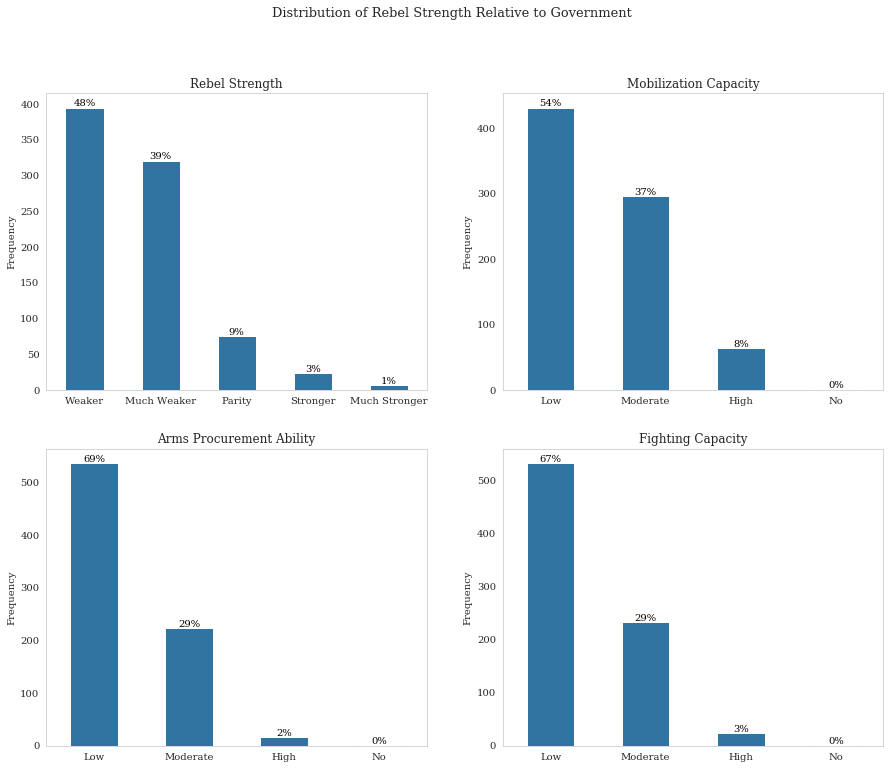

In [28]:
#rebstrength
nsa_reb_strength=conflict_df_copy.query('rebstrength.notnull()',engine='python')[['rebstrength','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_strength_order=nsa_reb_strength.rebstrength.value_counts().index


#rebstrength
nsa_reb_mobcap=conflict_df_copy.query('mobcap.notnull()',engine='python')[['mobcap','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_mobcap_order=nsa_reb_mobcap.mobcap.value_counts().index

#rebstrength
nsa_reb_armsproc=conflict_df_copy.query('armsproc.notnull()',engine='python')[['armsproc','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_armsproc_order=nsa_reb_armsproc.armsproc.value_counts().index

#rebstrength
nsa_reb_fightcap=conflict_df_copy.query('fightcap.notnull()',engine='python')[['fightcap','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_fightcap_order=nsa_reb_fightcap.fightcap.value_counts().index


fig, ax = plt.subplots(2,2,figsize = [15,12])
fig.suptitle('Distribution of Rebel Strength Relative to Government',fontsize=13)
base_color = sb.color_palette()[0]
#graph conflict subtypes
sb.countplot(data =nsa_reb_strength, x = 'rebstrength', color = base_color,order=nsa_reb_strength_order,ax=ax[0,0])
sb.countplot(data =nsa_reb_mobcap, x = 'mobcap', color = base_color,order=nsa_reb_mobcap_order,ax=ax[0,1])
sb.countplot(data =nsa_reb_armsproc, x = 'armsproc', color = base_color,order=nsa_reb_armsproc_order,ax=ax[1,0])
sb.countplot(data =nsa_reb_fightcap, x = 'fightcap', color = base_color,order=nsa_reb_fightcap_order,ax=ax[1,1])

xaxes_labels=['Rebel Strength','Mobilization Capacity','Arms Procurement Ability','Fighting Capacity']
reb_strength_df=[nsa_reb_strength,nsa_reb_mobcap,nsa_reb_armsproc,nsa_reb_fightcap]
xlabels=['rebstrength','mobcap','armsproc','fightcap']

for ax,xaxes,df,xlabel in zip(ax.flatten(),xaxes_labels,reb_strength_df,xlabels):

    for bar in ax.patches:
        x = bar.get_x()
        width = bar.get_width()
        centre = x + width/2.
        bar.set_x(centre - .5/2.)
        bar.set_width(.5)

        
    n_points = df.shape[0]
    
    cat_counts = df[xlabel].value_counts()
    locs = ax.get_xticks() # get the current tick locations and labels
    labels = ax.get_xticklabels()

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]

        
        pct_string = '{:0.0f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        ax.text(loc, count+2, pct_string, ha = 'center', color = 'black',family='serif',size=10
                )
    old_xticklabels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels=[x.title() for x in old_xticklabels])
    ax.set_ylabel('Frequency')
    ax.set_title(xaxes)
    ax.set_xlabel(' ')

                   

## Effect of Rebel Strength on the Outcome of Intrastate Dyads:
- There are four variables that measure rebel strength:
>1. rebel strength (a composite indicator)
>2. ability to procure arms (a proxy)
>3. fighting capacity (a proxy)
>4. mobilization capacity (a proxy)
- Surprisingly, when the strength of a rebel group is *much weaker* than the government or its ability to procure arms, fighting capacity and mobilization capacity is *lower* than that of the government, the most common outcome is **Low Activity** (instead of a Government victory).
- **Low activity** refers to conflicts that continue but do not reach the *25 battle related deaths* per year threshold set by the UCDP. There is no information in this dataset regarding the specific circumstance that led to a **Low Activity** outcome. According to the UCDP Conflict Termination codebook possible reasons may be because of successful military operations by the counterpart (i.e. victory). It could also be due to a strategic reorientation towards the use of nonviolent or nonfatal methods, to explore the possibility of negotiations, organizational reorganization, or intra-rebel fighting. It may often even be a combination of these factors. 
- When the strength of a rebel group is *weaker* than that of the government, the most common outcome is a **Government Victory**.
- When the strength of a rebel group is *at par* with the government the most common outcome is a **Peace Agreement**.
- Finally, when the rebel group is *stronger* than the government is a **Rebel Victory**.

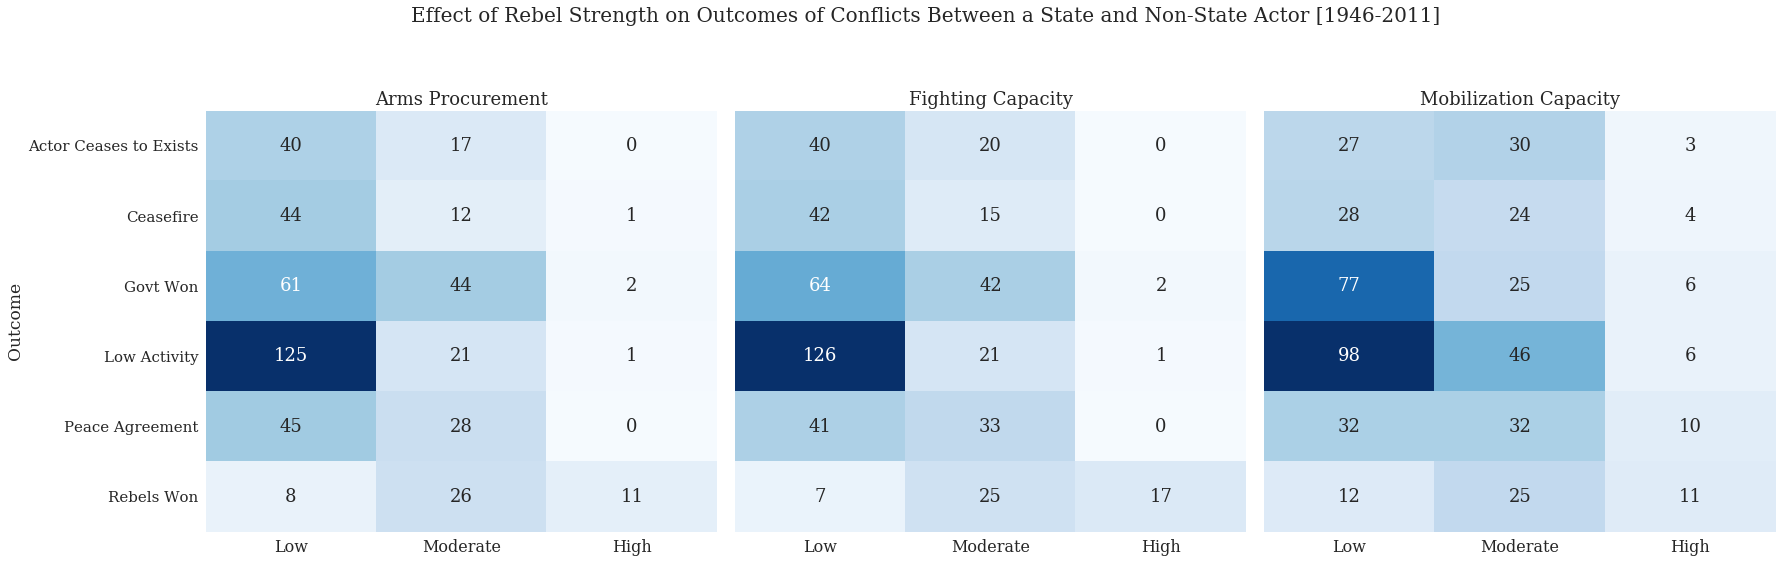

In [8]:
#DATAFRAME FOR REBEL STRENGTH
#rebstrength
nsa_reb_strength=conflict_df_copy.query('rebstrength.notnull()',engine='python')[['rebstrength','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_strength_order=nsa_reb_strength.rebstrength.value_counts().index
#mobcap
nsa_reb_mobcap=conflict_df_copy.query('mobcap.notnull()',engine='python')[['mobcap','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_mobcap_order=nsa_reb_mobcap.mobcap.value_counts().index
#armsproc
nsa_reb_armsproc=conflict_df_copy.query('armsproc.notnull()',engine='python')[['armsproc','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_armsproc_order=nsa_reb_armsproc.armsproc.value_counts().index
#fightcap
nsa_reb_fightcap=conflict_df_copy.query('fightcap.notnull()',engine='python')[['fightcap','outcome','new_dyadid_18']].drop_duplicates()
nsa_reb_fightcap_order=nsa_reb_fightcap.fightcap.value_counts().index

#combine dfs
reb_strengths=[nsa_reb_strength,nsa_reb_mobcap,nsa_reb_armsproc,nsa_reb_fightcap]
updated_reb_strengths=pd.DataFrame(columns=['outcome','new_dyadid_18','variable','value'])
for df in reb_strengths:
    df=pd.melt(df, id_vars=['outcome','new_dyadid_18'], value_vars=df.columns[0])
    updated_reb_strengths=pd.concat([updated_reb_strengths,df])
    
reb_strengths_outcome=updated_reb_strengths.groupby(['variable','outcome','value']).size().reset_index(name='count')
reb_strengths_outcome_hm=reb_strengths_outcome.query('outcome!="--"')



plt.rcParams['font.family'] = "serif"



#HEATMAP FUNCTION
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2]).fillna(0)
    d= d[['low','moderate','high']]
    d=d.reindex()
    plt.rcParams['font.family'] = "serif"
    sb.heatmap(d, xticklabels=True, yticklabels=True,annot = True, cmap = "Blues" ,vmin=-1,fmt='g', annot_kws={"size": 18},**kwargs)

    
    
    
    
#PLOT HEATMAP
g = sb.FacetGrid(data = reb_strengths_outcome_hm.query('variable!="rebstrength"'), col = 'variable',height=8)
g.map_dataframe(draw_heatmap,'value','outcome',  'count', cbar=False)

plt.subplots_adjust(top=.8)

g.fig.suptitle('Effect of Rebel Strength on Outcomes of Conflicts Between a State and Non-State Actor [1946-2011]',fontsize=20)

titles=['Arms Procurement','Fighting Capacity','Mobilization Capacity']
for ax,title in zip(g.axes.flat,titles):
    # set aspect of all axis
    ax.set(xlabel='',ylabel='')
    ax.set_title(label=title,fontsize=18)
    ax.set_xticklabels(['Low','Moderate','High'],size=16)

    

g.axes.flat[0].set_ylabel('Outcome', fontsize = 17)
g.axes.flat[0].set_yticklabels([label.get_text() for label in g.axes.flat[0].get_yticklabels()],size=15)

plt.show()



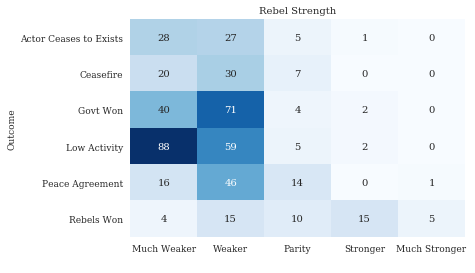

In [9]:

fig,ax=plt.subplots()
sb.heatmap(data=reb_strengths_outcome_hm.query('variable=="rebstrength"').pivot_table(index='outcome',columns='value',values='count').fillna(0)[['much weaker','weaker','parity','stronger','much stronger']],annot = True, cmap = "Blues" ,fmt='g', cbar=False);
ax.set_ylabel('Outcome',fontsize=9)
ax.set_xlabel(' ',fontsize=9)
ax.set_title('Rebel Strength',fontsize=10)
ax.set_xticklabels(['Much Weaker','Weaker','Parity','Stronger','Much Stronger'],size=9,rotation=0)
ax.set_yticklabels(ax.get_yticklabels(),size=9);


## Foreign Support for Rebels & Governments:

- The type and degree of support offered to rebel groups and governments captures the transnational dimension of state based conflicts. 
- While internal conflicts between governments and rebel groups would seem to imply an intrinsically domestic affair, many such conflicts are influenced by support extended from foreign governments or external rebel groups. 
- Governments received either explicit or alleged support in exactly 50% of dyads while rebels experienced a similar show of support at 48%. However, this support wasn't evenly distributed across each dyad. Both governments and rebel groups received alleged or explicit support in 137 dyads. However, in 95 dyads only governments received support while in 83 dyads only rebels received support. Moreover, 150 state based dyads did not receive any support. 
- Thus, while it is quite common for both (or neither) the government or rebels to have support from an external state, there are a significant number of cases where only one of the two sides receives support. Moreover, this support is predominately military rather than non-military (e.g. finances, logistics, medical supplies).


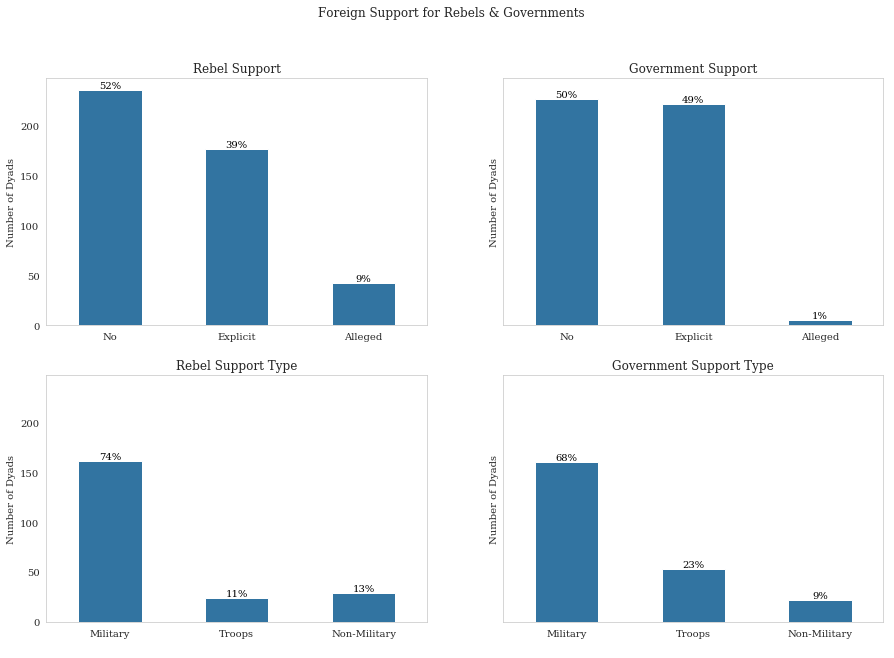

In [33]:
#nsa_reb_support
nsa_reb_support=conflict_df_copy.query('rebel_support.notnull()',engine='python')[['rebel_support','new_dyadid_18']].drop_duplicates()
nsa_reb_support_order=nsa_reb_support.rebel_support.value_counts().index


#nsa_gov_support
nsa_gov_support=conflict_df_copy.query('gov_support.notnull()',engine='python')[['gov_support','new_dyadid_18']].drop_duplicates()
nsa_gov_support_order=nsa_gov_support.gov_support.value_counts().index


#nsa_rtypesup
nsa_rtypesup=conflict_df_copy.query('rtypesup.notnull()',engine='python')[['rtypesup','new_dyadid_18']].drop_duplicates()
nsa_rtypesup_order=nsa_rtypesup.rtypesup.value_counts().index


#nsa_rtypesup
nsa_gtypesup=conflict_df_copy.query('gtypesup.notnull()',engine='python')[['gtypesup','new_dyadid_18']].drop_duplicates()
nsa_gtypesup_order=nsa_gtypesup.gtypesup.value_counts().index



plt.rcParams['font.family'] = "serif"
fig, ax = plt.subplots(2,2,figsize = [15,10],sharey=True)
fig.suptitle('Foreign Support for Rebels & Governments')
base_color = sb.color_palette()[0]
#graph conflict subtypes
sb.countplot(data =nsa_reb_support, x = 'rebel_support', color = base_color,order=nsa_reb_support_order,ax=ax[0,0])
sb.countplot(data =nsa_gov_support, x = 'gov_support', color = base_color,order=nsa_gov_support_order,ax=ax[0,1])
sb.countplot(data =nsa_rtypesup, x = 'rtypesup', color = base_color,order=nsa_gtypesup_order,ax=ax[1,0])
sb.countplot(data =nsa_gtypesup, x = 'gtypesup', color = base_color,order=nsa_gtypesup_order,ax=ax[1,1])

titles=['Rebel Support','Government Support','Rebel Support Type','Government Support Type']
support_df=[nsa_reb_support,nsa_gov_support,nsa_rtypesup,nsa_gtypesup]
xlabels=['rebel_support','gov_support','rtypesup','gtypesup']

for ax,title,df,xlabel in zip(ax.flatten(),titles,support_df,xlabels):
    for bar in ax.patches:
        x = bar.get_x()
        width = bar.get_width()
        centre = x + width/2.
        bar.set_x(centre - .5/2.)
        bar.set_width(.5)
    n_points = df.shape[0]
    
    cat_counts = df[xlabel].value_counts()
    locs = ax.get_xticks() # get the current tick locations and labels
    labels = ax.get_xticklabels()

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]

        pct_string = '{:0.0f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        ax.text(loc, count+2, pct_string, ha = 'center', color = 'black',family='serif',size=10)
        
    old_xticklabels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels=[x.title() for x in old_xticklabels])
    ax.set_ylabel('Number of Dyads')
    ax.set_xlabel(' ')
    ax.set_title(title)

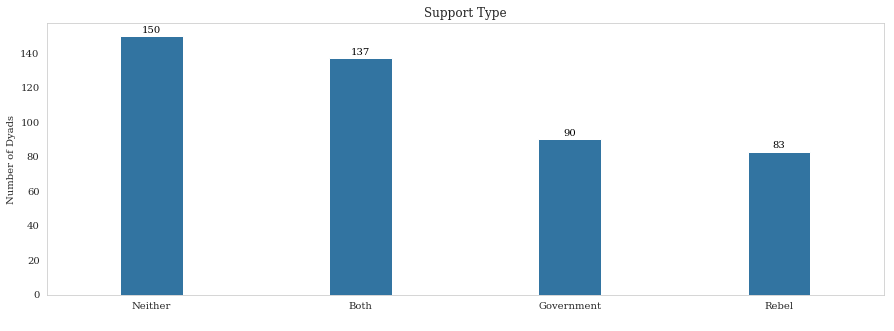

In [34]:
plt.rcParams['font.family'] = "serif"
fig,ax=plt.subplots(figsize = [15,5])

conditions=[((conflict_df_copy['rebel_support']=="explicit") |
(conflict_df_copy['rebel_support']=="alleged")) &
((conflict_df_copy['gov_support']=="explicit") |
(conflict_df_copy['gov_support']=="alleged")),
    (conflict_df_copy['rebel_support']=="explicit") |
(conflict_df_copy['rebel_support']=="alleged") ,
(conflict_df_copy['gov_support']=="explicit") |
(conflict_df_copy['gov_support']=="alleged")]
           
choices=['Both','Rebel','Government']
external_support=conflict_df_copy.copy()
external_support['support']=np.select(conditions,choices,'Neither')
external_support=external_support.query('rebel_support.notnull()',engine='python')[['support','new_dyadid_18']].drop_duplicates()
sb.countplot(data =external_support, x = 'support', color = base_color)
ax.set(title='Support Type',ylabel='Number of Dyads',xlabel=' ')
for bar in ax.patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - .3/2.)
    bar.set_width(.3)
    
    
n_points = external_support.shape[0]

cat_counts = external_support['support'].value_counts()
locs = ax.get_xticks() # get the current tick locations and labels
labels = ax.get_xticklabels()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]

    pct_string = count

    # print the annotation just below the top of the bar
    ax.text(loc, count+2, pct_string, ha = 'center', color = 'black',family='serif',size=10)

## Foreign Support for Rebels & Governments:
>- 67% of intrastate conflicts have received external support
-  By limiting the scope to governments that have offered external support in more than five dyads it appears that there is an overlap between parties that support governments and parties that support rebels. Noteably, Russia, Libya, US and China are in the top 10 for supporting both rebels and governments in the most number of dyads. 
- It should also be noted that governments offering foreign support are concentrated in the Middle East and Africa.



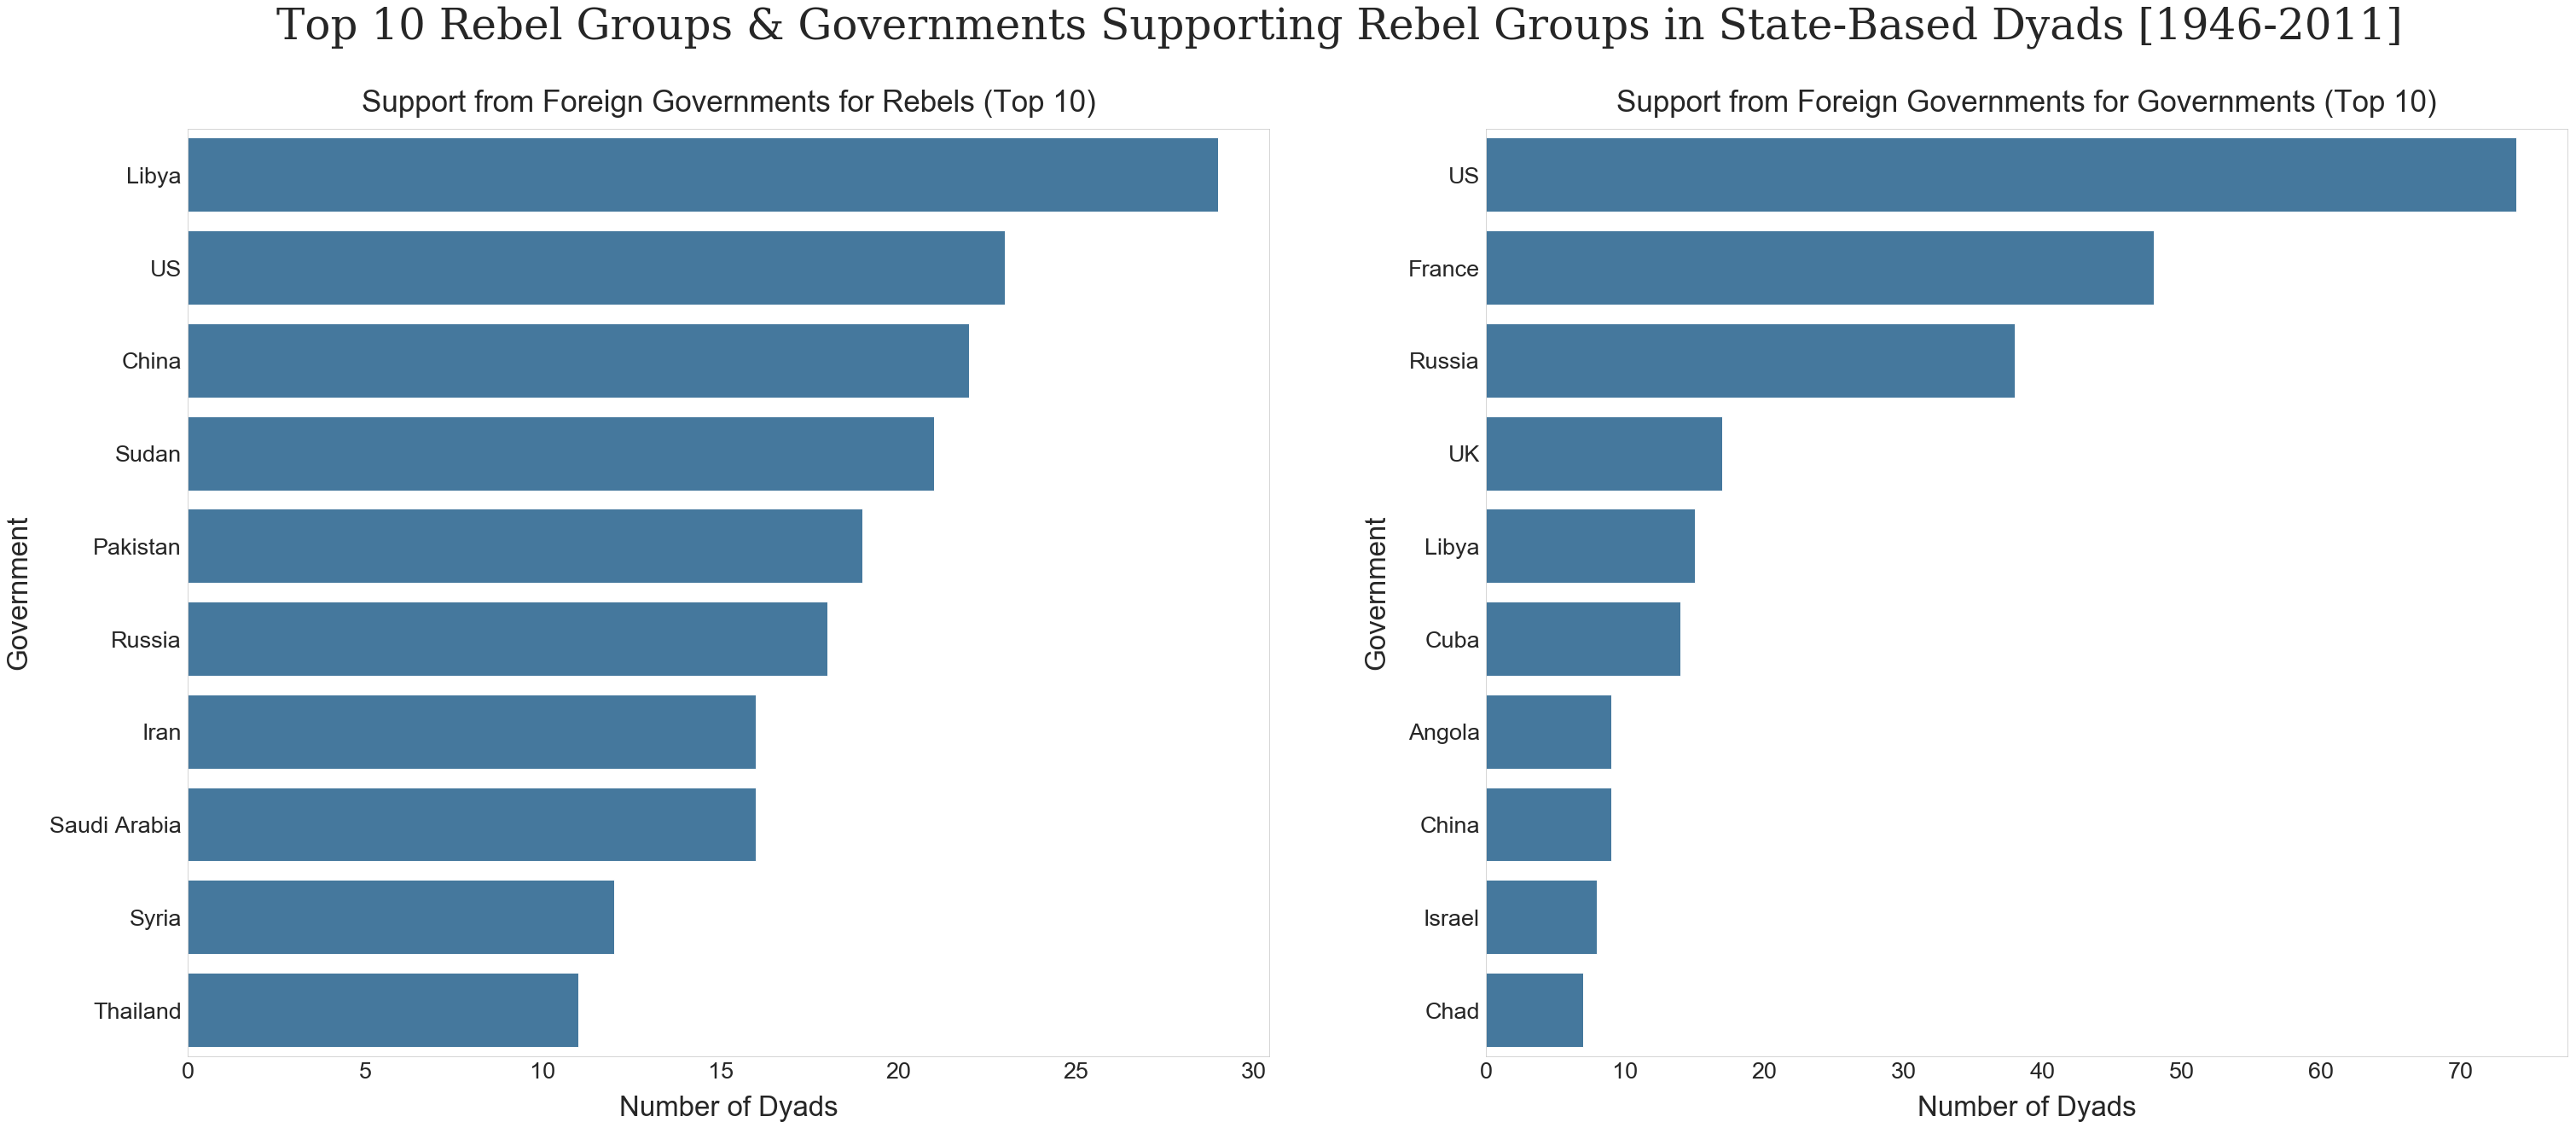

In [11]:

sb.set_style("whitegrid",{'axes.grid': False})
base_color = sb.color_palette("Blues_d")[2]

nsa_rsupname=conflict_df_copy.query('rsupname!="None" & rsupname!="Others"')[['rsupname','new_dyadid_18']].drop_duplicates()
nsa_rsupname_explode=pd.DataFrame(nsa_rsupname.rsupname.str.split(',').tolist(),index=nsa_rsupname.new_dyadid_18).stack().to_frame('rsupname').reset_index().drop('level_1',axis=1)
             
             
             
#nsa_rsupname
nsa_rsupname=nsa_rsupname_explode.query('rsupname!="None"')[['rsupname','new_dyadid_18']].drop_duplicates()
nsa_rsupname.rsupname=nsa_rsupname.rsupname.str.strip()
nsa_rsupname=nsa_rsupname.rsupname.value_counts().to_frame('frequency').reset_index()
nsa_rsupname.rename(columns={'index':'reb_support_name'},inplace=True)
nsa_rsupname=nsa_rsupname.sort_values('frequency',ascending=False).iloc[:10]



nsa_gsupname=conflict_df_copy.query('gsupname!="None"')[['gsupname','new_dyadid_18']].drop_duplicates()
nsa_gsupname_explode=pd.DataFrame(nsa_gsupname.gsupname.str.split(',').tolist(),index=nsa_gsupname.new_dyadid_18).stack().to_frame('gsupname').reset_index().drop('level_1',axis=1)
             
             
             
#nsa_gsupname
nsa_gsupname=nsa_gsupname_explode.query('gsupname!="None"')[['gsupname','new_dyadid_18']].drop_duplicates()
nsa_gsupname.gsupname=nsa_gsupname.gsupname.str.strip()
nsa_gsupname=nsa_gsupname.gsupname.value_counts().to_frame('frequency').reset_index()
nsa_gsupname.rename(columns={'index':'gov_support_name'},inplace=True)
nsa_gsupname.rename(columns={'index':'gov_support_name'},inplace=True)
nsa_gsupname=nsa_gsupname.sort_values('frequency',ascending=False).iloc[:10]



fig,ax = plt.subplots(1,2,figsize = [50,20])


#REBEL SUPPORT PLOT
sb.barplot(y=nsa_rsupname.reb_support_name, x=nsa_rsupname.frequency,color = base_color,ax=ax[0])
#GOVERNMENT SUPPORT PLOT
sb.barplot(y=nsa_gsupname.gov_support_name, x=nsa_gsupname.frequency,color = base_color,ax=ax[1])


#ASTHETICS
plt.rcParams['font.family'] = "serif"
fig.suptitle('Top 10 Rebel Groups & Governments Supporting Rebel Groups in State-Based Dyads [1946-2011]',fontsize=50)

support_titles=['Support from Foreign Governments for Rebels (Top 10)','Support from Foreign Governments for Governments (Top 10)']
for ax,title in zip(ax.flatten(),support_titles):
    plt.rcParams['font.family'] = "serif"
    ax.set_xlabel(xlabel='Number of Dyads',labelpad=15,fontsize=33)
    ax.set_ylabel('Government',labelpad=20,fontsize=33)
    plt.rcParams['font.family'] = "serif"
    ax.set_title(title,pad=20,fontsize=35)
    ax.xaxis.set_tick_params(labelsize=27)
    ax.yaxis.set_tick_params(labelsize=27)


    


## Relationship Between Spread and Magnitude of Battle Related Deaths by Parties Involved:

>- The rank order of parties involved in the highest number of battle related deaths does not align with the hierarchy of the median battle related deaths per party involved. For instance, the Islamic State is involved in the second highest number of battle related deaths by rebel group. However, it is the nineth highest when ranked by median battle related deaths.
- This misalignment suggests that the bulk of battle related deaths are the product of a particularly intense period within a dyad rather than a representation of the uniform intensity across the entire span of the dyad. 

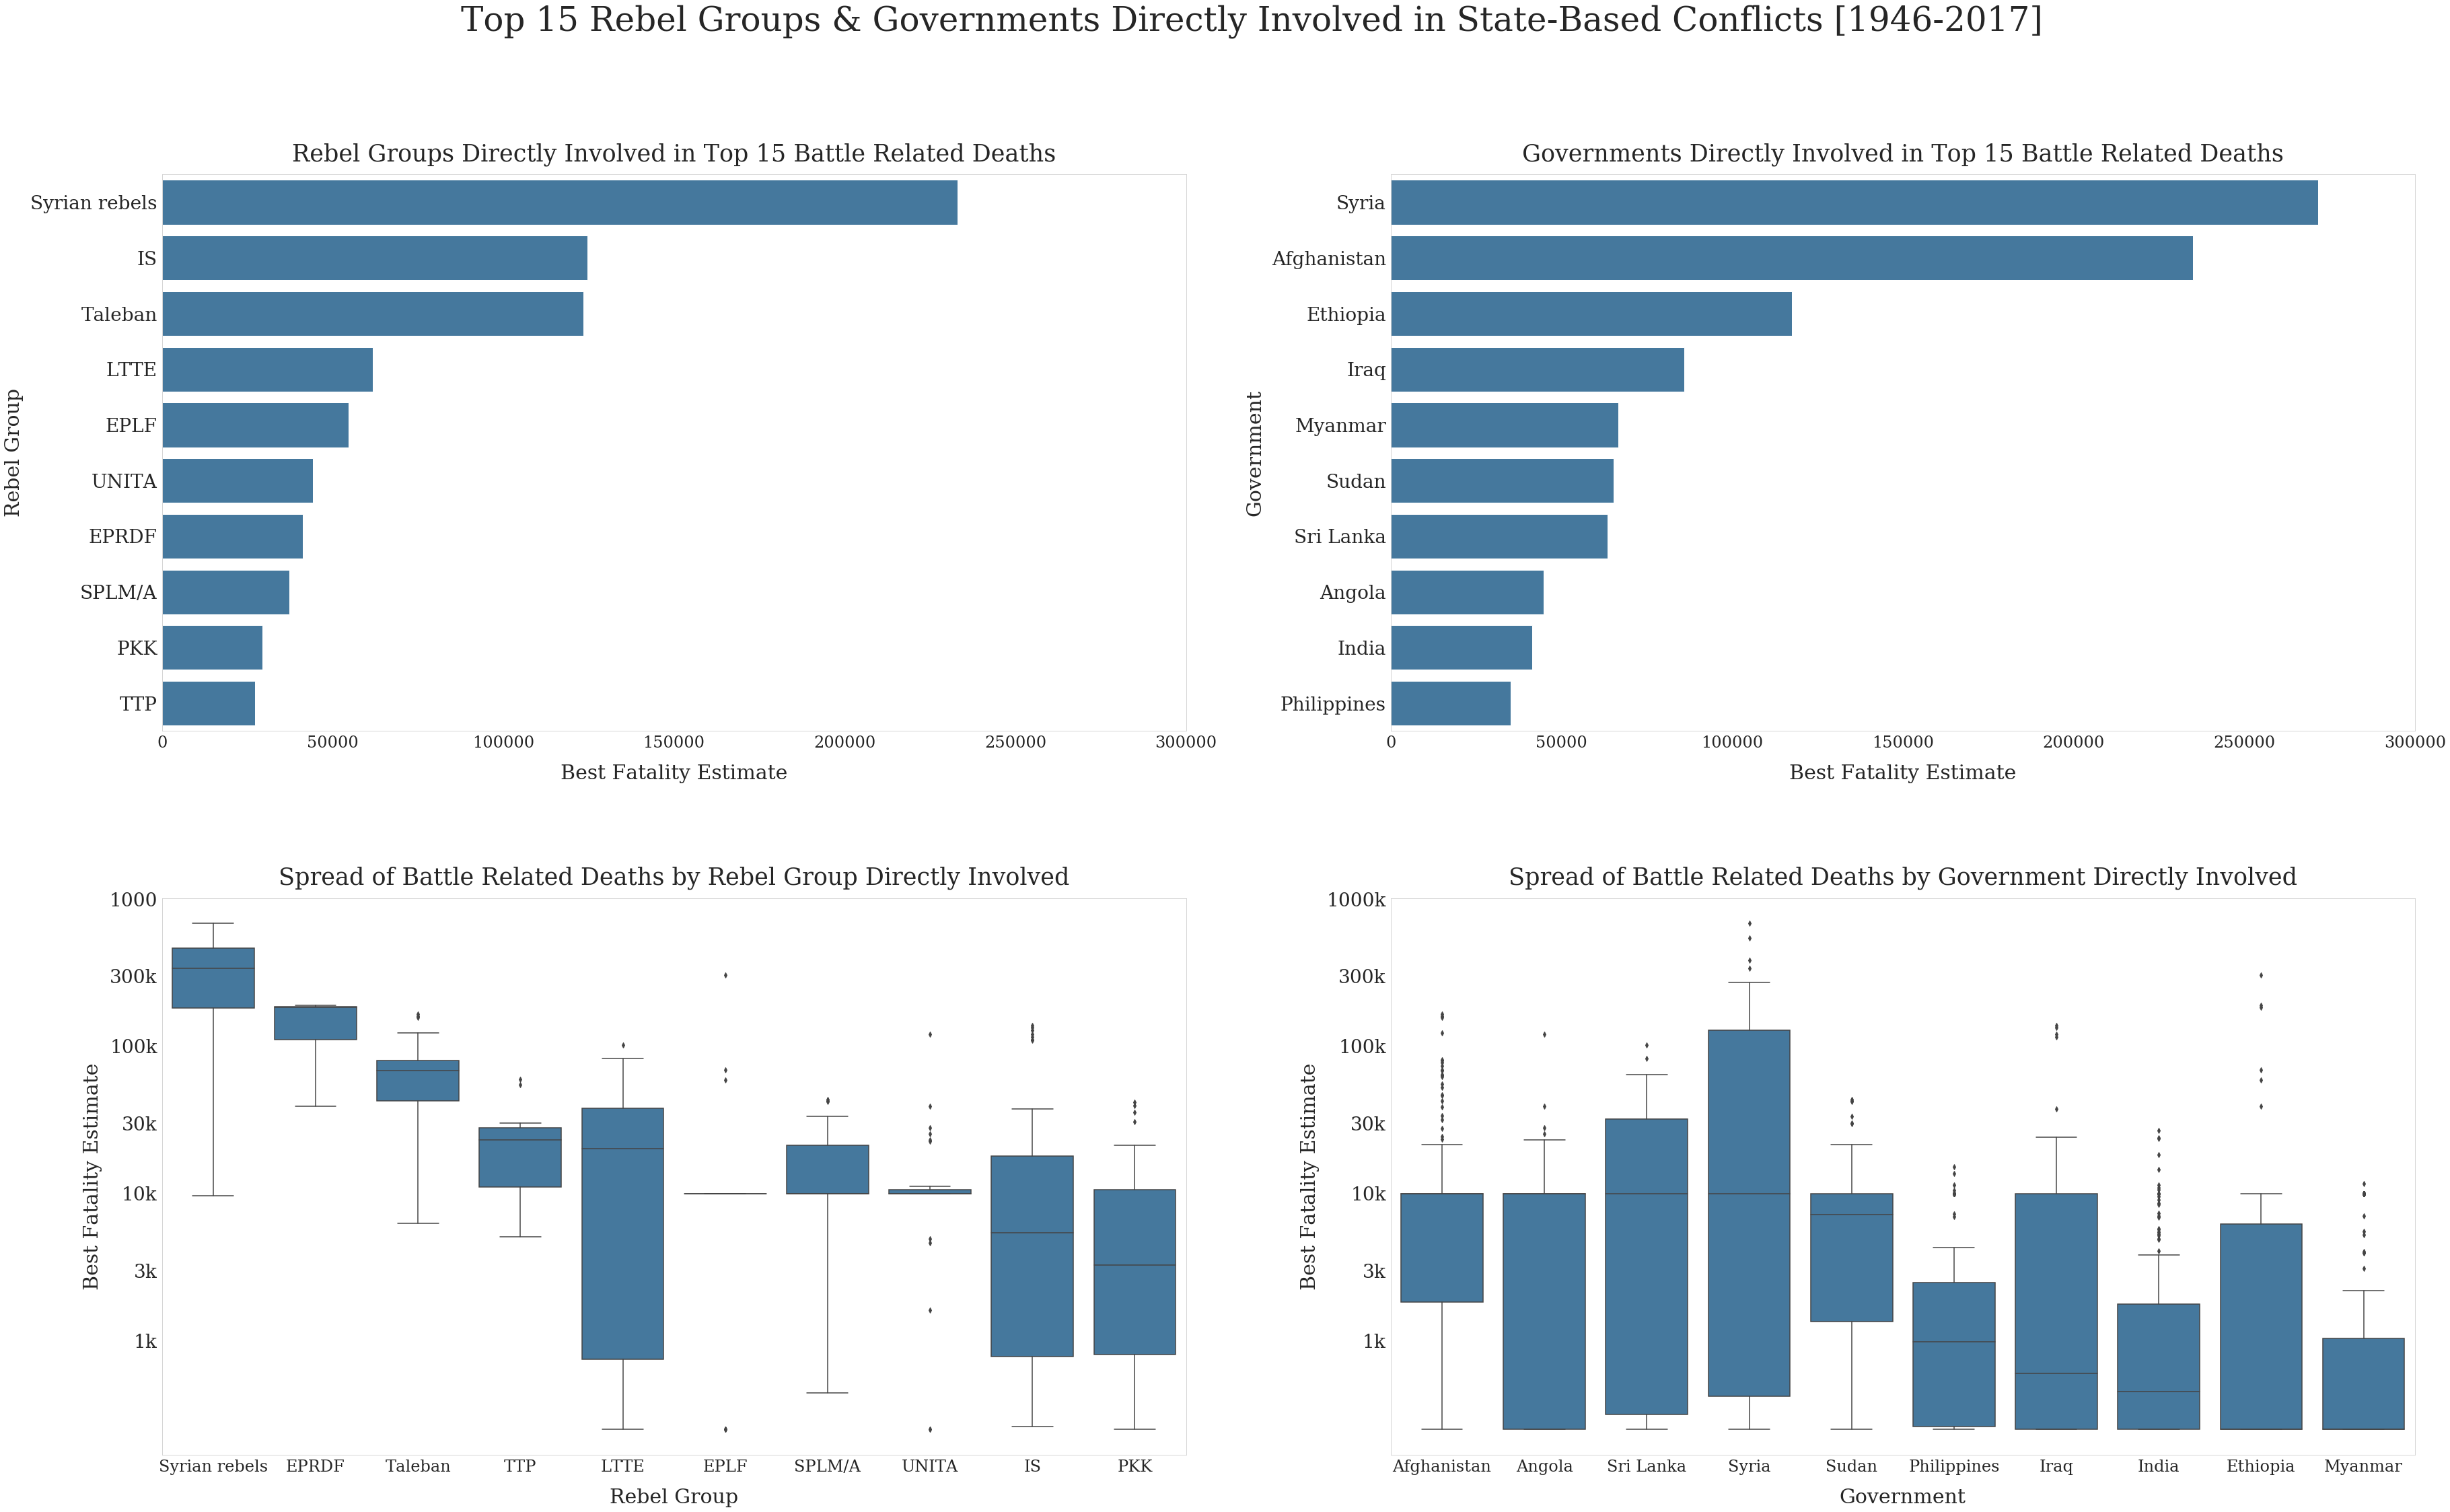

In [12]:
base_color = sb.color_palette("Blues_d")[2]

rebel_groups_state_based=conflict_df_copy.query('conflict_type=="state_based" & type!="interstate"')[['side_b','best_fatality_estimate']].rename(columns={'side_b':'rebel_group'})
rebel_groups_state_based['rebel_group'].replace({'Syrian insurgents':'Syrian rebels'},inplace=True)

rebel_groups_brd=rebel_groups_state_based.groupby('rebel_group')['best_fatality_estimate'].sum().to_frame().sort_values('best_fatality_estimate',ascending=False).reset_index().iloc[:10]
#governments involved frequency
rebel_groups_state_based['log_deaths']=np.log10(rebel_groups_state_based['best_fatality_estimate'])
top_rebels=rebel_groups_state_based.groupby('rebel_group')[['best_fatality_estimate']].sum().reset_index().sort_values('best_fatality_estimate',ascending=False).iloc[:10].rebel_group.values
top_rebels_order=rebel_groups_state_based.query('rebel_group in @top_rebels').groupby('rebel_group')[['log_deaths']].median().reset_index().sort_values('log_deaths',ascending=False).rebel_group.values




gov_state_based=conflict_df_copy.query('conflict_type=="state_based" & type!="interstate"')[['side_a','best_fatality_estimate']]
gov_state_based['side_a'].replace({'Government of Myanmar (Burma)':'Myanmar'},inplace=True)
gov_brd=gov_state_based.groupby('side_a')['best_fatality_estimate'].sum().to_frame().sort_values('best_fatality_estimate',ascending=False).reset_index().iloc[:10]
gov_state_based['log_deaths']=np.log10(gov_state_based['best_fatality_estimate'])
top_govs=gov_state_based.groupby('side_a')[['best_fatality_estimate']].sum().reset_index().sort_values('best_fatality_estimate',ascending=False).iloc[:10].side_a.values
top_govs_order=gov_state_based.query('side_a in @top_govs').groupby('side_a')[['log_deaths']].median().reset_index().sort_values('log_deaths',ascending=False).side_a.values




fig,ax=plt.subplots(2,2,figsize=(60,35))


#REBEL GROUPS INVOLVED
sb.barplot(data=rebel_groups_brd,y='rebel_group',x='best_fatality_estimate',color=base_color,ax=ax[0,0]);
ax[0,0].set_xticks(np.arange(0,gov_brd.best_fatality_estimate.max()+50000,50000))




#REBEL GROUPS BATTLE RELATE DEATH DISTIRUBTION
sb.boxplot(data = rebel_groups_state_based.query('rebel_group in @top_rebels'), x = 'rebel_group',y = 'best_fatality_estimate', color = base_color,order=top_rebels_order, ax=ax[1,0])
plt.sca(ax[1,0])
plt.yscale('log')
plt.yticks([1e2,3e2, 1e3, 3e3,1e4,3e4,1e5], ['1k','3k', '10k','30k', '100k','300k','1000']);
ax[1,0].set(ylabel='Battle Related Deaths', xlabel='Rebel Group',title='Distribution of Battle Related Deaths Distribution by Rebel Group');





#GOVERNMENT GROUPS INVOLVED
sb.barplot(data=gov_brd,y='side_a',x='best_fatality_estimate',color=base_color,ax=ax[0,1]);
labels = [item.get_text() for item in ax[0,1].get_yticklabels()]
labels_update = [item.replace('Government of ','') for item in labels]
ax[0,1].set_yticklabels(labels_update);
ax[0,1].set(xticks=np.arange(0,gov_brd.best_fatality_estimate.max()+50000,50000))


#GOVERNMENTS GROUPS BATTLE RELATE DEATH DISTIRUBTION
sb.boxplot(data = gov_state_based.query('side_a in @top_govs'), x = 'side_a',y = 'best_fatality_estimate', color = base_color,order=top_govs_order, ax=ax[1,1])
plt.sca(ax[1,1])
plt.yscale('log')
plt.yticks([1e2,3e2, 1e3, 3e3,1e4,3e4,1e5], ['1k','3k', '10k','30k', '100k','300k','1000k']);
labels = [item.get_text() for item in ax[1,1].get_xticklabels()]
labels_update = [item.replace('Government of ','') for item in labels]
ax[1,1].set_xticklabels(labels_update)


    
fig.subplots_adjust(hspace=.3)
    
fig.suptitle('Top 15 Rebel Groups & Governments Directly Involved in State-Based Conflicts [1946-2017]',fontsize=50)
titles=['Rebel Groups Directly Involved in Top 15 Battle Related Deaths','Governments Directly Involved in Top 15 Battle Related Deaths','Spread of Battle Related Deaths by Rebel Group Directly Involved','Spread of Battle Related Deaths by Government Directly Involved']
xlabels=['Best Fatality Estimate','Best Fatality Estimate','Rebel Group','Government']
ylabels=['Rebel Group','Government','Best Fatality Estimate','Best Fatality Estimate']
for ax,title,ylabel,xlabel in zip(ax.flatten(),titles,ylabels,xlabels):
    ax.set_xlabel(xlabel,labelpad=20,fontsize=30)
    ax.set_ylabel(ylabel,labelpad=10,fontsize=30)
    ax.set_title(title,pad=20,fontsize=35)
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=28)
    
    

## Effect of Rebel Group's Ideology on Instrastate Conflicts

>In **257 intrastate dyads**, *(i.e. conflicts between the government of a state and an organized rebel group),* the rebel group was founded with a specific political ideology. The most common ideology is **Nationalism  at 44%** followed by **Communism at 28%**. The least common political ideologies are **Religion (2%)** and **Right (2%)**. 
- In dyads, both governments and rebel groups may receive support from foreign governments. Across these 257 dyads, there are only two rebel founding political ideologies for which the Rebel Groups receive *more foreign support* in aggregate from foreign governments - Nationalist and Right ideologies.


- In the mid 1900s, dyads in which rebel groups identified with **Communism resulted in the highest number of battle deaths** compared to dyads tied to other ideologies. Over the last few decades, **Nationalism has surpassed Communism** as the ideology associated with the highest number of battle deaths. This is likely owing to the fall of Soviet Union and the proliferation of globalization and its consequences like immigration that have fueled nationalist sentiment. 
- While **Religion only constitutes 2%** of all dyads in which rebels are founded on a political ideology it is also has the *highest percentage of outcomes as Government Victories (60%)* across all ideologies (and no Rebel Victories). This may indicate that dyads in which rebel groups are founded on a religious ideology are the most concerning to governments of a state and therefore warrant more attention and resources by the government. This focus and attention is in turn likely to lead to the significant percentage of outcomes resulting in government victories as shown in the heat map. 
- Interestingly, the ideology with the *highest concentration of dyads resulting in a Rebel Victory is the Right.*



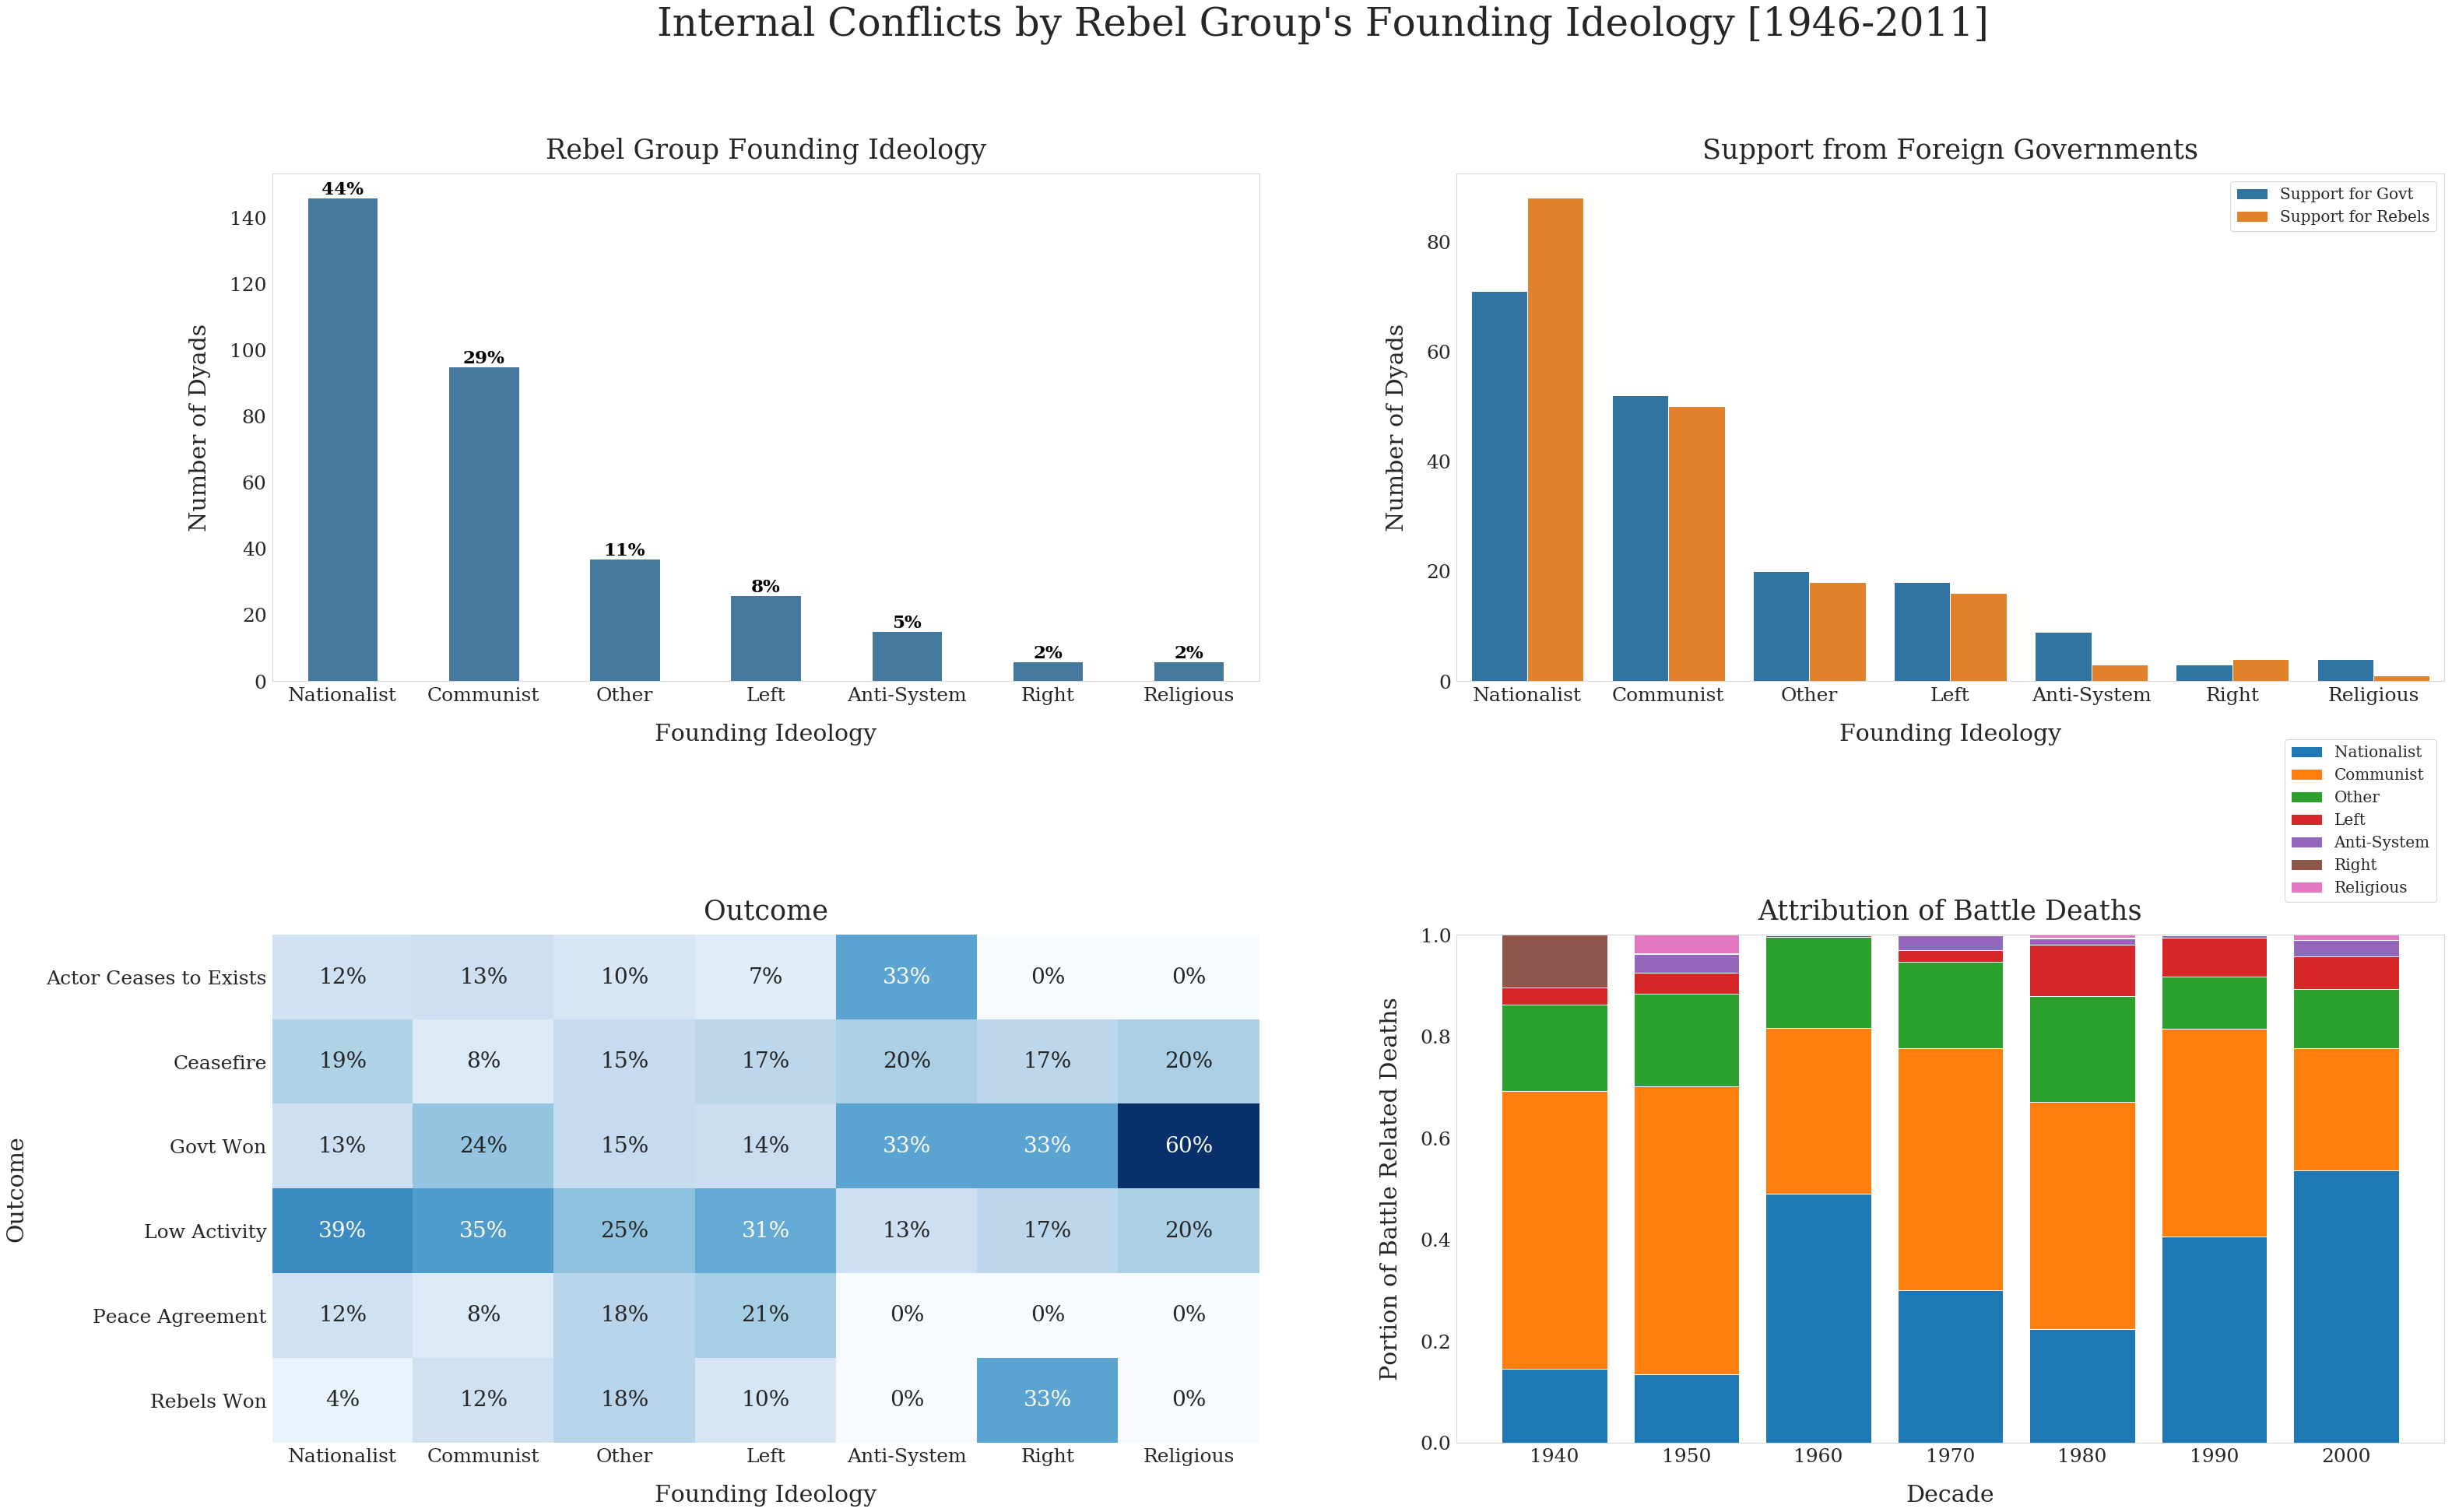

In [15]:


#ideolcom
ideolcom=conflict_df_copy.query('ideolcom!=0 & ideolcom.notnull()',engine='python')[['ideolcom','new_dyadid_18','outcome','gov_support','rebel_support','best_fatality_estimate','year']]
ideolcom.ideolcom.replace(1,'Communist',inplace=True)

#ideolleft
ideolleft=conflict_df_copy.query('ideolleft!=0 & ideolleft.notnull()',engine='python')[['ideolleft','new_dyadid_18','outcome','gov_support','rebel_support','best_fatality_estimate','year']]
ideolleft.ideolleft.replace(1,'Left',inplace=True)


#ideolright
ideolright=conflict_df_copy.query('ideolright!=0 & ideolright.notnull()',engine='python')[['ideolright','new_dyadid_18','outcome','gov_support','rebel_support','best_fatality_estimate','year']]
ideolright.ideolright.replace(1,'Right',inplace=True)

#ideolnat
ideolnat=conflict_df_copy.query('ideolnat!=0 & ideolnat.notnull()',engine='python')[['ideolnat','new_dyadid_18','outcome','gov_support','rebel_support','best_fatality_estimate','year']]
ideolnat.ideolnat.replace(1,'Nationalist',inplace=True)


#ideolanti
ideolanti=conflict_df_copy.query('ideolanti!=0 & ideolanti.notnull()',engine='python')[['ideolanti','new_dyadid_18','outcome','gov_support','rebel_support','best_fatality_estimate','year']]
ideolanti.ideolanti.replace(1,'Anti-System',inplace=True)


#ideolrel
ideolrel=conflict_df_copy.query('ideolanti!=0 & ideolanti.notnull()',engine='python')[['ideolrel','new_dyadid_18','outcome','gov_support','rebel_support','best_fatality_estimate','year']]
ideolrel.ideolrel.replace(1,'Religious',inplace=True)


#ideoloth
ideoloth=conflict_df_copy.query('ideoloth!=0 & ideoloth.notnull()',engine='python')[['ideoloth','new_dyadid_18','outcome','gov_support','rebel_support','best_fatality_estimate','year']]
ideoloth.ideoloth.replace(1,'Other',inplace=True)


#PRIMARY DF
ideols_df=[ideolcom,ideolleft,ideolright,ideolnat,ideolanti, ideolrel, ideoloth]
for ideol in ideols_df:
    ideol.rename(columns={ideol.columns[0]:'type'}, inplace=True)    
reb_ideols=pd.concat(ideols_df).query('type!=0')








fig, ax = plt.subplots(2,2,figsize = [50,30])

default_color = sb.color_palette()[0]


#COUNTPLOT DF
ideol_count=reb_ideols[['type','new_dyadid_18']].drop_duplicates()
ideol_count_order=ideol_count.type.value_counts().index

#COUNTPLOT 
sb.countplot(data =ideol_count, x= 'type', color = base_color,order=ideol_count_order,ax=ax[0,0])
ax[0,0].set(xlabel='Rebel Ideologies',ylabel='Frequency',title='Rebel Group Founding Ideology')
for bar in ax[0,0].patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - .5/2.)
    bar.set_width(.5)

n_points = ideol_count.shape[0]
cat_counts = ideol_count['type'].value_counts()
locs = ax[0,0].get_xticks() # get the current tick locations and labels
labels = ax[0,0].get_xticklabels()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    # print the annotation just below the top of the bar
    ax[0,0].text(loc, count+1, pct_string, ha = 'center', color = 'black',size=23,family='serif',weight='bold')

    
#BARPLOT DF
ideols_support=reb_ideols.copy()
ideols_support['gov_support']=np.where((reb_ideols['gov_support']=="no") | (reb_ideols['gov_support']==np.nan),"no","yes")
ideols_support['rebel_support']=np.where((reb_ideols['rebel_support']=="no") | (reb_ideols['rebel_support']==np.nan),"no","yes")
ideols_support=ideols_support[['gov_support','rebel_support','type','new_dyadid_18']].drop_duplicates()
ideols_support=pd.melt(ideols_support,id_vars=['type'],value_vars=['gov_support','rebel_support']).query('value=="yes"').groupby(['type','variable'])['value'].count().reset_index()

#BARPLOT 
sb.barplot(data=ideols_support,x='type', y='value',hue='variable',order=ideol_count_order,ax=ax[0,1])
h, l = ax[0,1].get_legend_handles_labels()
labels=['Support for Govt','Support for Rebels']
ax[0,1].legend(h, labels,loc='upper right',prop={'size': 20});

#HEATMAP DF
ideols_outcome=reb_ideols[['new_dyadid_18','outcome','type']].query('outcome!="--"').drop_duplicates().groupby(['type','outcome']).count().reset_index()
ideols_outcome['pct']=ideols_outcome.new_dyadid_18/ideols_outcome.groupby(['type'])['new_dyadid_18'].transform('sum')
ideols_outcome=ideols_outcome.pivot_table(index='outcome',columns='type',values='pct').fillna(0)[ideol_count_order]
ideols_outcome=ideols_outcome.apply(lambda x: (x*100).round(0))

#HEATMAP 
sb.heatmap(ideols_outcome,xticklabels=True, yticklabels=True,annot = True,  cbar=False,cmap = "Blues", annot_kws={'size':28},fmt='g',ax=ax[1,0])
for t in ax[1,0].texts: 
    t.set_text(t.get_text() + "%")
plt.sca(ax[1,0])
plt.yticks(rotation=0) 
    
    
    

#STACKED CHART DF
plt.sca(ax[1,1])
ideols_brd=reb_ideols[['year','type','best_fatality_estimate']]
ideols_brd['decade']=ideols_brd.year//10*10
ideols_brd=ideols_brd.groupby(['decade','type'])['best_fatality_estimate'].sum().reset_index()


initial=pd.DataFrame({'decade':np.arange(1940,2010,10).repeat(7),'type':ideols_brd['type'].drop_duplicates().to_list()*7})
ideols_brd=initial.merge(ideols_brd,how='left',on=['decade','type']).fillna(0)
ideols_brd["best_fatality_estimate"]=ideols_brd.best_fatality_estimate/ideols_brd.groupby('decade')['best_fatality_estimate'].transform('sum')

#STACKED CHART

cat1_order=np.arange(1940,2010,10)
cat2_order=ideol_count_order.to_list()
baselines=np.zeros(len(cat1_order))
for i in range(len(cat2_order)):
    cat2=cat2_order[i]
    inner_counts=ideols_brd[ideols_brd['type'] == cat2].groupby('decade').best_fatality_estimate.sum()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order,loc='lower right',bbox_to_anchor=(1,1.05),prop={'size': 20});

fig.subplots_adjust(hspace=.5)
fig.suptitle("Internal Conflicts by Rebel Group's Founding Ideology [1946-2011]",fontsize=50)
titles=['Rebel Group Founding Ideology',"Support from Foreign Governments","Outcome","Attribution of Battle Deaths"]
xlabels=['Founding Ideology','Founding Ideology','Founding Ideology','Decade']
ylabels=['Number of Dyads','Number of Dyads','Outcome','Portion of Battle Related Deaths']
for ax,title,ylabel,xlabel in zip(ax.flatten(),titles,ylabels,xlabels):
    ax.set_xlabel(xlabel,labelpad=24,fontsize=30)
    ax.set_ylabel(ylabel,labelpad=24,fontsize=30)
    ax.tick_params(labelsize=25)
    ax.set_title(title,pad=20,fontsize=35)
    


## Effect of Rebel Group's Initial Goal on Instrastate Conflict

>In **402 intrastate dyads**,  the Rebel Groups’s were documented to specify an **initial goal**. The most common goal is **Removal of Current Government  at 37%** followed by **Pursuit of an Independent State at 20%**. The least common initial goal is **Religion (3%)** . 
- In aggregate, dyads in which the Rebel Group’s  initial goal is the pursuit of an **Independent State, Increased Rights or Autonomy** has led to Rebel Groups receiving *more foreign support* in aggregate from foreign governments.
- In the mid 1900s, dyads in which Rebel Group’s initial goal was the **Pursuit of an Independent State** resulted in the highest number of battle deaths  compared to dyads tied to other goals. Over the last few decades however, the **Removal of Current Government has surpassed the Pursuit of Independence as the goal associated with the highest number of battle deaths.  

- The highest concentration of dyads that have resulted in a Government Victory are those in which the Rebel Group’s initial goal was the Removal of a Current Government. This follows from the fact that this goal is a direct threat and therefore most likely the biggest cause of concern for the government of the state.
- While **Religion only constitutes 2%** of all dyads in which rebels are founded on a political ideology it is also has the *highest percentage of outcomes as Government Victories (60%)* across all ideologies (and no Rebel Victories). This may indicate that dyads in which rebel groups are founded on a religious ideology are the most concerning to governments of a state and therefore warrant more attention and resources by the government. This focus and attention is in turn likely to lead to the significant percentage of outcomes resulting in government victories as shown in the heat map.
- Dyads in which the Rebel Group’s initial goal was Democratization has resulted in the  *highest concentration of outcomes in Rebel Victories.*


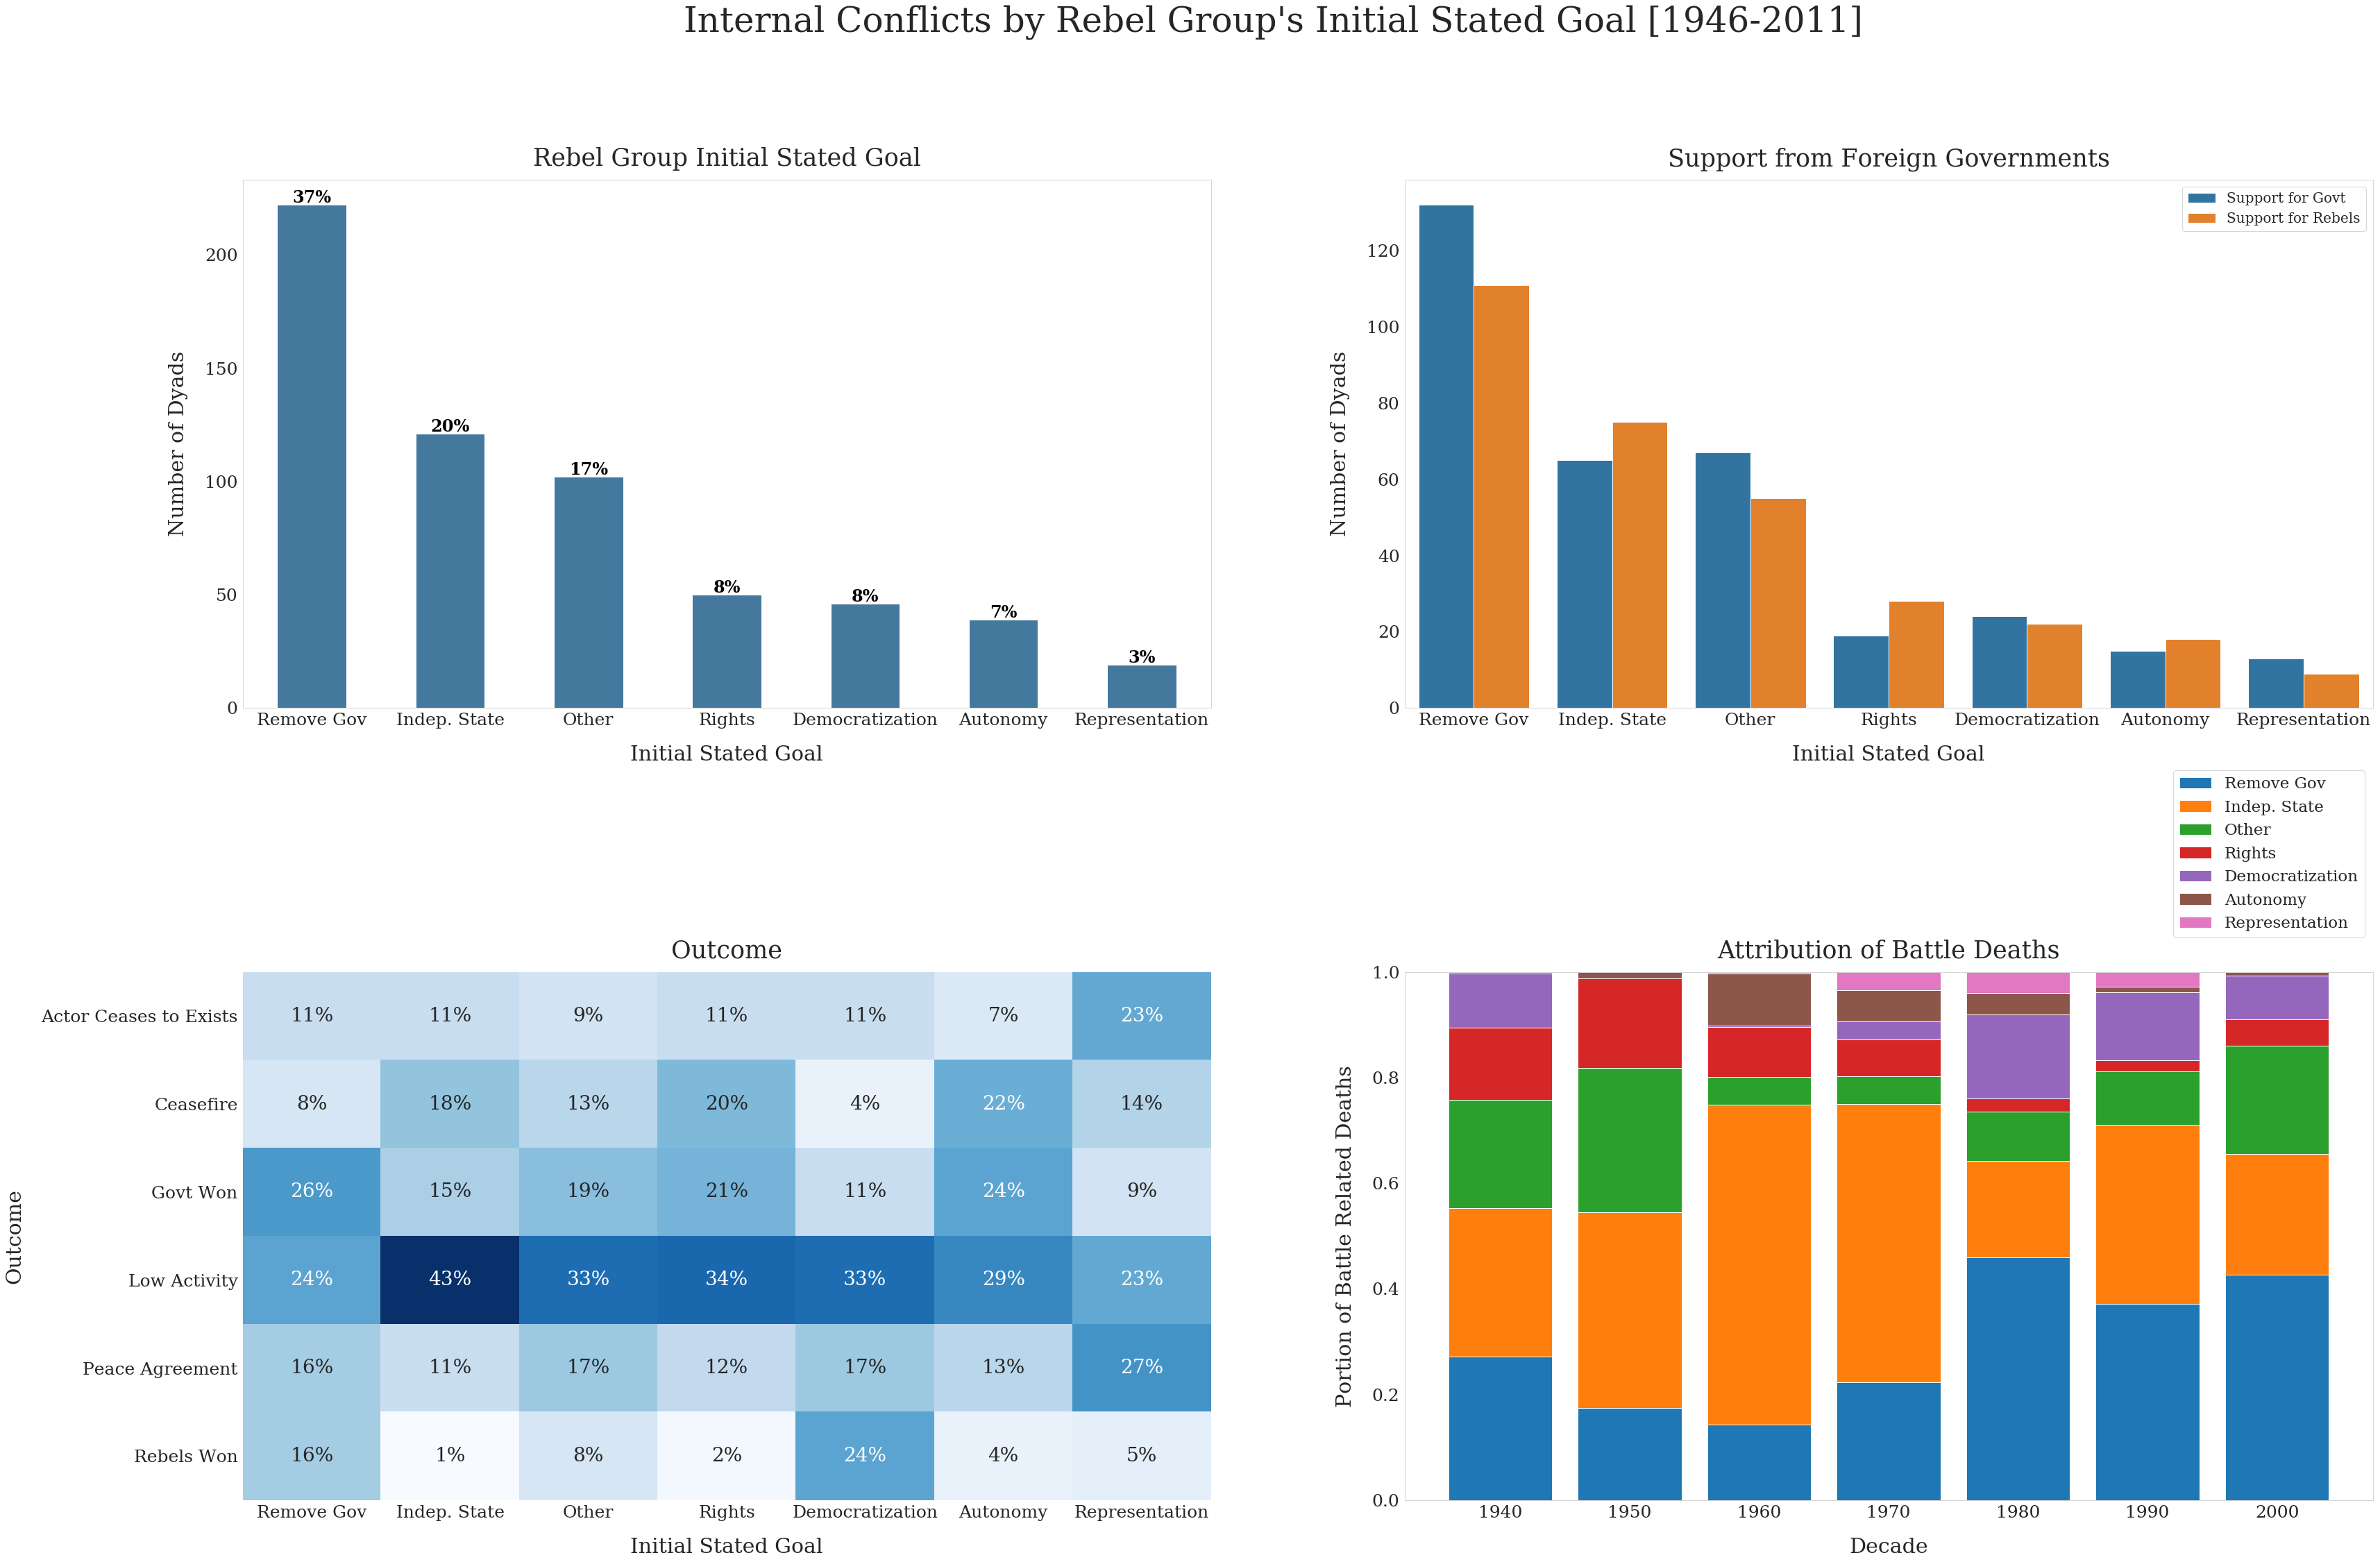

In [47]:
#goalinde
goalindep=conflict_df_copy.query('goalindep!=0 & goalindep.notnull()',engine='python')[['goalindep','outcome','new_dyadid_18','gov_support','rebel_support','best_fatality_estimate','year']]
goalindep.goalindep.replace(1,'Independent State',inplace=True)

#goalauto
goalauto=conflict_df_copy.query('goalauto!=0 & goalauto.notnull()',engine='python')[['goalauto','outcome','new_dyadid_18','gov_support','rebel_support','best_fatality_estimate','year']]
goalauto.goalauto.replace(1,'Autonomy',inplace=True)


#goalrights
goalrights=conflict_df_copy.query('goalrights!=0 & goalrights.notnull()',engine='python')[['goalrights','outcome','new_dyadid_18','gov_support','rebel_support','best_fatality_estimate','year']]
goalrights.goalrights.replace(1,'Rights',inplace=True)

#goalrep
goalrep=conflict_df_copy.query('goalrep!=0 & goalrep.notnull()',engine='python')[['goalrep','outcome','new_dyadid_18','gov_support','rebel_support','best_fatality_estimate','year']]
goalrep.goalrep.replace(1,'Representation',inplace=True)


#goalchange
goalchange=conflict_df_copy.query('goalchange!=0 & goalchange.notnull()',engine='python')[['goalchange','outcome','new_dyadid_18','gov_support','rebel_support','best_fatality_estimate','year']]
goalchange.goalchange.replace(1,'Remove Current Govt.',inplace=True)


#goaldem
goaldem=conflict_df_copy.query('goaldem!=0 & goaldem.notnull()',engine='python')[['goaldem','outcome','new_dyadid_18','gov_support','rebel_support','best_fatality_estimate','year']]
goaldem.goaldem.replace(1,'Democratization',inplace=True)


#goalother
goalother=conflict_df_copy.query('goalother!=0 & goalother.notnull()',engine='python')[['goalother','outcome','new_dyadid_18','gov_support','rebel_support','best_fatality_estimate','year']]
goalother.goalother.replace(1,'Other',inplace=True)



#PRIMARY DF
goals_df=[goalindep, goalauto,goalrights,goalrep,goalchange,goaldem,goalother]
for goal in goals_df:
    goal.rename(columns={goal.columns[0]:'type'}, inplace=True)
reb_goals=pd.concat(goals_df).query('type!=0')

reb_goals['type'].replace({'Independent State':'Indep. State','Remove Current Govt.':"Remove Gov"},inplace=True)



fig, ax = plt.subplots(2,2,figsize = [55,35])
default_color = sb.color_palette()[0]



#COUNTPLOT DF
goal_count=reb_goals[['type','new_dyadid_18']].drop_duplicates()
goal_count_order=goal_count.type.value_counts().index

#COUNTPLOT 
sb.countplot(data =goal_count, x= 'type', color = base_color,order=goal_count_order,ax=ax[0,0])
ax[0,0].set(xlabel='Rebel Goal',ylabel='Frequency',title='Rebel Group Initial Stated Goal')
for bar in ax[0,0].patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - .5/2.)
    bar.set_width(.5)

n_points = goal_count.shape[0]
cat_counts = goal_count['type'].value_counts()
locs = ax[0,0].get_xticks() # get the current tick locations and labels
labels = ax[0,0].get_xticklabels()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    # print the annotation just below the top of the bar
    ax[0,0].text(loc, count+1, pct_string, ha = 'center', color = 'black',size=24,family='serif',weight='bold')




#BARPLOT DF
goals_support=reb_goals.copy()
goals_support['gov_support']=np.where((goals_support['gov_support']=="no") | (goals_support['gov_support']==np.nan),"no","yes")
goals_support['rebel_support']=np.where((goals_support['rebel_support']=="no") | (goals_support['rebel_support']==np.nan),"no","yes")
goals_support=goals_support[['gov_support','rebel_support','type','new_dyadid_18']].drop_duplicates()
goals_support=pd.melt(goals_support,id_vars=['type'],value_vars=['gov_support','rebel_support']).query('value=="yes"').groupby(['type','variable'])['value'].count().reset_index()

#BARPLOT 
sb.barplot(data=goals_support,x='type', y='value',hue='variable',order=goal_count_order, ax=ax[0,1])
h, l = ax[0,1].get_legend_handles_labels()
labels=['Support for Govt','Support for Rebels']
ax[0,1].legend(h, labels,loc='upper right',prop={'size': 20});


#HEATMAP DF
goals_outcomes=reb_goals[['new_dyadid_18','outcome','type']].query('outcome!="--"').drop_duplicates().groupby(['type','outcome']).count().reset_index()
goals_outcomes['pct']=goals_outcomes.new_dyadid_18/goals_outcomes.groupby(['type'])['new_dyadid_18'].transform('sum')
goals_outcomes=goals_outcomes.pivot_table(index='outcome',columns='type',values='pct').fillna(0)[goal_count_order]
goals_outcomes=goals_outcomes.apply(lambda x: (x*100).round(0))

#HEATMAP 
sb.heatmap(goals_outcomes,xticklabels=True, yticklabels=True,annot = True,  cbar=False,cmap = "Blues" , annot_kws={"size": 28},fmt='g',ax=ax[1,0])
for t in ax[1,0].texts: 
    t.set_text(t.get_text() + "%")
plt.sca(ax[1,0])
plt.yticks(rotation=0) 
    
    
    

#STACKED CHART DF
plt.sca(ax[1,1])
goal_brd=reb_goals[['year','type','best_fatality_estimate']]
goal_brd['decade']=goal_brd.year//10*10
goal_brd=goal_brd.groupby(['decade','type'])['best_fatality_estimate'].sum().reset_index()


initial=pd.DataFrame({'decade':np.arange(1940,2010,10).repeat(7),'type':goal_brd['type'].drop_duplicates().to_list()*7})
goal_brd=initial.merge(goal_brd,how='left',on=['decade','type']).fillna(0)
goal_brd["best_fatality_estimate"]=goal_brd.best_fatality_estimate/goal_brd.groupby('decade')['best_fatality_estimate'].transform('sum')

#STACKED CHART

cat1_order=np.arange(1940,2010,10)
cat2_order=goal_count_order.to_list()
baselines=np.zeros(len(cat1_order))
for i in range(len(cat2_order)):
    cat2=cat2_order[i]
    inner_counts=goal_brd[goal_brd['type'] == cat2].groupby('decade').best_fatality_estimate.sum()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order,loc='lower right',bbox_to_anchor=(1,1.05),prop={'size': 23});


fig.subplots_adjust(hspace=.5)
fig.suptitle("Internal Conflicts by Rebel Group's Initial Stated Goal [1946-2011]",fontsize=50)
titles=['Rebel Group Initial Stated Goal',"Support from Foreign Governments","Outcome","Attribution of Battle Deaths"]
xlabels=['Initial Stated Goal','Initial Stated Goal','Initial Stated Goal','Decade']
ylabels=['Number of Dyads','Number of Dyads','Outcome','Portion of Battle Related Deaths']
for ax,title,ylabel,xlabel in zip(ax.flatten(),titles,ylabels,xlabels):
    ax.set_xlabel(xlabel,labelpad=24,fontsize=30)
    ax.set_ylabel(ylabel,labelpad=24,fontsize=30)
    ax.tick_params(labelsize=25)
    ax.set_title(title,pad=20,fontsize=35)

## Effect of Rebel Group's Religion Affiliation on Instrastate Conflicts

- In **79 intrastate dyads**,  the Rebel Groups’s were documented to be founded around a **religious identity**. 
>- With the exception of Bhuddism, the religions with which rebel groups have identified with are proselytizing which may in turn have played a role in insitigating conflict. The **Sunni Muslim** sect of Islam is the most prominent religion at 56% (among rebels that identified with a religion) followed by **Other Christian** at 15%. Rebels that identify with the Sunni Muslim sect were also involved in territorial disputes over Palestine and Mindanao - the second and third most frequent territorial incompatibilities. 
>- The **Shia Muslim sect** is the only religious identity espoused by rebel groups that has results in dyads in which Rebel Groups receive *more foreign support* in aggregate from foreign governments.

- The only dyad in which the Rebel Group's founding religion was Buddhism ended in a ceasefire. With the exception of the Sunni Muslim sect, no rebel group founded on a religious identity results in a victory for the rebel group. The most common outcome is **Low Activity**, **Ceasefire** or **Government Victory**.
- In the 1940s and 1950s *undefined* Muslims had a strong presence on the battlefield with more than half of the battle related deaths being attributed to dyads in which Rebel Group's were claimed to be *undefined Mulims*. In the 1960's *Other Christians* accounted for nearly all the battle related deaths. Since the 1960's the Muslim sunnis appear to dominated the fatality landscape - accounting for more than half the battle related deaths in each decade.

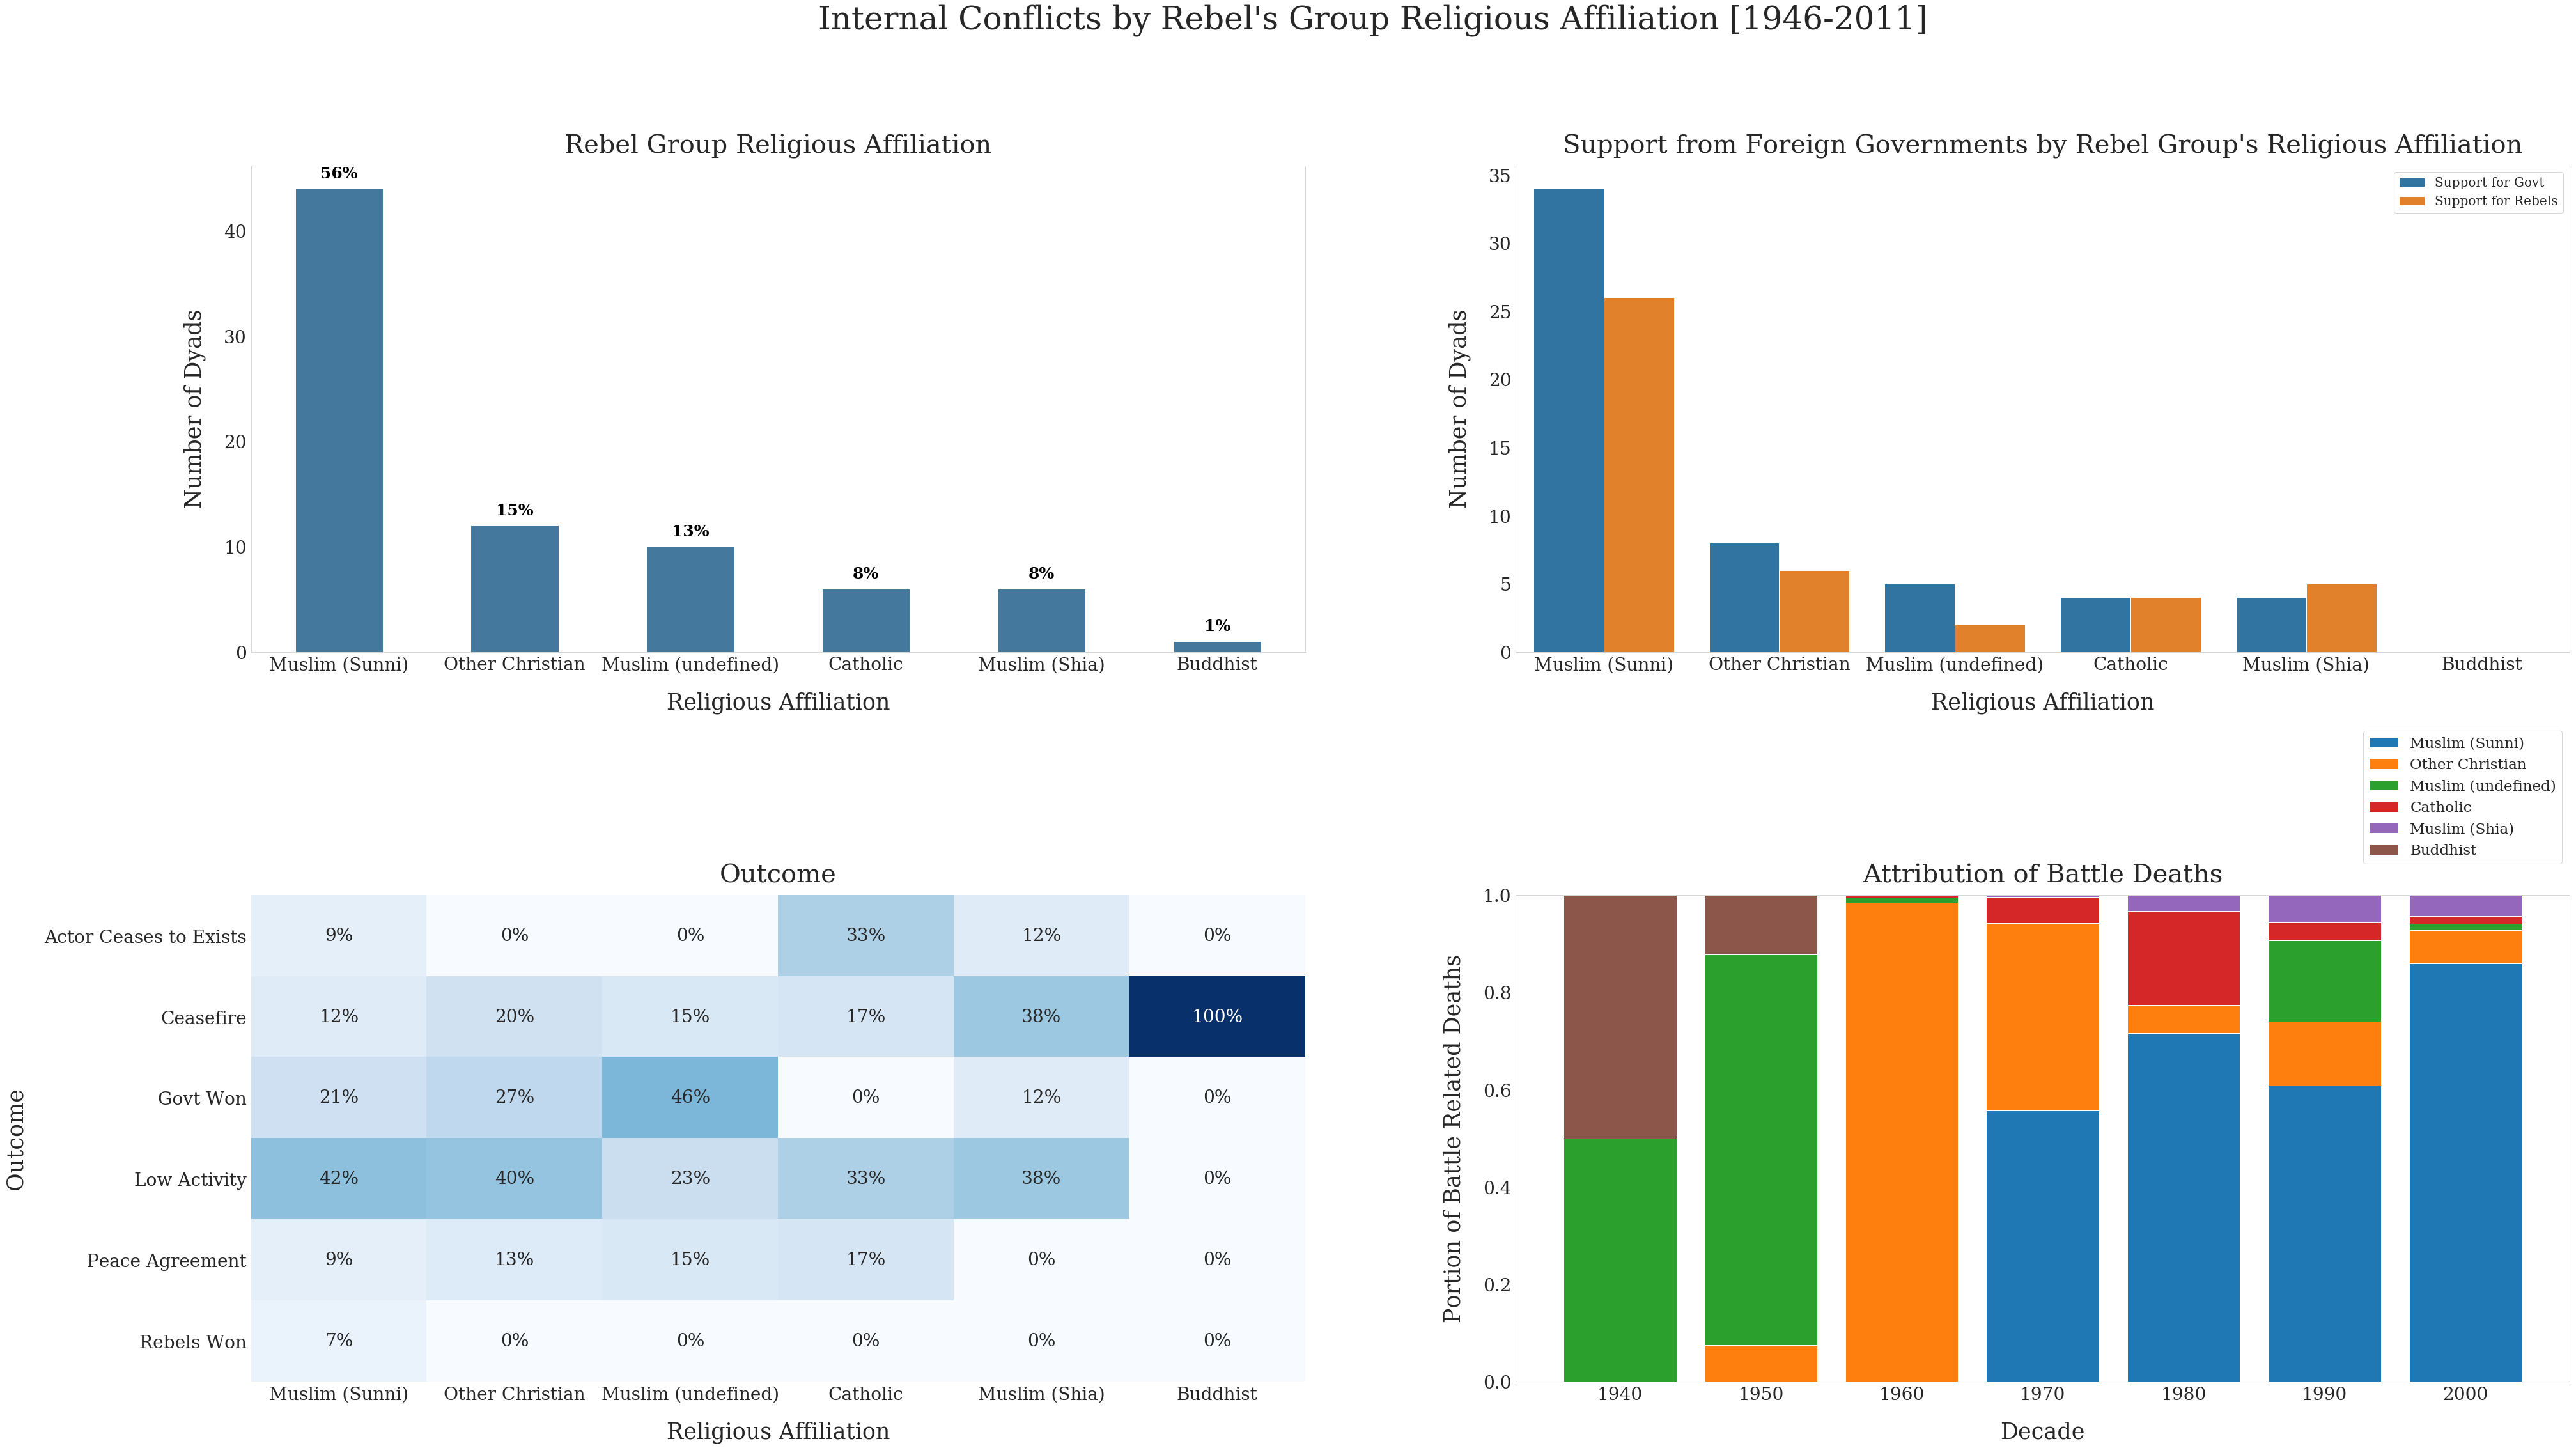

In [14]:
reb_religion=conflict_df_copy.query('religion!="--" & religion!="None"')[['religion','new_dyadid_18','gov_support','outcome','rebel_support','best_fatality_estimate','year']]
reb_religion_order=reb_religion.religion.value_counts().index
reb_religion.rename(columns={'religion':'type'}, inplace=True)
   
    
    

fig, ax = plt.subplots(2,2,figsize = [65,35])
fig.subplots_adjust(hspace=0.5)
default_color = sb.color_palette()[0]



#COUNTPLOT DF
religion_count=reb_religion[['type','new_dyadid_18']].drop_duplicates()
religion_count_order=religion_count.type.value_counts().index

#COUNTPLOT 
sb.countplot(data =religion_count, x= 'type', color = base_color,order=religion_count_order,ax=ax[0,0])
ax[0,0].set(xlabel='Rebel Goal',ylabel='Frequency',title='Rebel Group Initial Stated Goal')
for bar in ax[0,0].patches:
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - .5/2.)
    bar.set_width(.5)


n_points = religion_count.shape[0]
cat_counts = religion_count['type'].value_counts()
locs = ax[0,0].get_xticks() # get the current tick locations and labels
labels = ax[0,0].get_xticklabels()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    # print the annotation just below the top of the bar
    ax[0,0].text(loc, count+1, pct_string, ha = 'center', color = 'black',size=25,family='serif',weight='bold')

    
    
#BARPLOT DF
religion_support=reb_religion.copy()
religion_support['gov_support']=np.where((religion_support['gov_support']=="no") | (religion_support['gov_support']==np.nan),"no","yes")
religion_support['rebel_support']=np.where((religion_support['rebel_support']=="no") | (religion_support['rebel_support']==np.nan),"no","yes")
religion_support=religion_support[['gov_support','rebel_support','type','new_dyadid_18']].drop_duplicates()
religion_support=pd.melt(religion_support,id_vars=['type'],value_vars=['gov_support','rebel_support']).query('value=="yes"').groupby(['type','variable'])['value'].count().reset_index()

#BARPLOT 
sb.barplot(data=religion_support,x='type', y='value',hue='variable',order=religion_count_order, ax=ax[0,1])
h, l = ax[0,1].get_legend_handles_labels()
labels=['Support for Govt','Support for Rebels']
ax[0,1].legend(h, labels,loc='upper right',prop={'size': 20});


#HEATMAP DF
religion_outcomes=reb_religion[['new_dyadid_18','outcome','type']].query('outcome!="--"').drop_duplicates().groupby(['type','outcome']).count().reset_index()
religion_outcomes['pct']=religion_outcomes.new_dyadid_18/religion_outcomes.groupby(['type'])['new_dyadid_18'].transform('sum')
religion_outcomes=religion_outcomes.pivot_table(index='outcome',columns='type',values='pct').fillna(0)[religion_count_order]
religion_outcomes=religion_outcomes.apply(lambda x: (x*100).round(0))

#HEATMAP 
sb.heatmap(religion_outcomes,xticklabels=True, yticklabels=True,annot = True,  cbar=False,cmap = "Blues" ,annot_kws={"size": 28},fmt='g',ax=ax[1,0])
for t in ax[1,0].texts: 
    t.set_text(t.get_text() + "%")
plt.sca(ax[1,0])
plt.yticks(rotation=0) 
    
    
    

#STACKED CHART DF
plt.sca(ax[1,1])
religion_brd=reb_religion[['year','type','best_fatality_estimate']]
religion_brd['decade']=religion_brd.year//10*10
religion_brd=religion_brd.groupby(['decade','type'])['best_fatality_estimate'].sum().reset_index()


initial=pd.DataFrame({'decade':np.arange(1940,2010,10).repeat(6),'type':religion_brd['type'].drop_duplicates().to_list()*7})
religion_brd=initial.merge(religion_brd,how='left',on=['decade','type']).fillna(0)
religion_brd["best_fatality_estimate"]=religion_brd.best_fatality_estimate/religion_brd.groupby('decade')['best_fatality_estimate'].transform('sum')

#STACKED CHART

cat1_order=np.arange(1940,2010,10)
cat2_order=religion_count_order.to_list()
baselines=np.zeros(len(cat1_order))
for i in range(len(cat2_order)):
    cat2=cat2_order[i]
    inner_counts=religion_brd[religion_brd['type'] == cat2].groupby('decade').best_fatality_estimate.sum()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order,loc='lower right',bbox_to_anchor=(1,1.05),prop={'size': 23});




fig.suptitle("Internal Conflicts by Rebel's Group Religious Affiliation [1946-2011]",fontsize=50)
titles=['Rebel Group Religious Affiliation',"Support from Foreign Governments by Rebel Group's Religious Affiliation",'Outcome',"Attribution of Battle Deaths"]
xlabels=['Religious Affiliation','Religious Affiliation','Religious Affiliation','Decade']
ylabels=['Number of Dyads','Number of Dyads','Outcome','Portion of Battle Related Deaths']
for ax,title,ylabel,xlabel in zip(ax.flatten(),titles,ylabels,xlabels):
    ax.set_xlabel(xlabel,labelpad=28,fontsize=35)
    ax.set_ylabel(ylabel,labelpad=28,fontsize=35)
    ax.tick_params(labelsize=28)
    ax.set_title(title,pad=20,fontsize=40)